# Week 4 - Univariate Analysis, part 2

## 1. Lesson - None

## 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from kagglehub import KaggleDatasetAdapter, dataset_load
from sklearn.preprocessing import LabelEncoder
from ydata_profiling        import ProfileReport
from ydata_profiling.config import Settings

# custom settings object
custom_settings = Settings()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# # Set default figure size and style
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 2
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['grid.alpha'] = 0.1
plt.rcParams['axes.grid'] = False

# Define color palette
PRIMARY_COLOR   = 'midnightblue'
SECONDARY_COLOR = 'cornflowerblue'

np.random.seed(0)
num_data    = 100
data        = np.exp(np.random.uniform(size = num_data) * 4)
df          = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

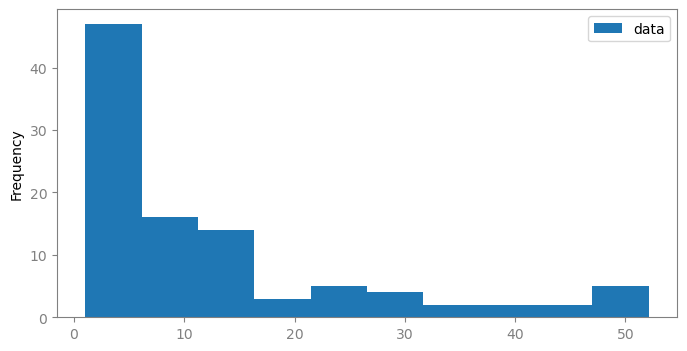

In [376]:
print(f"The 75th percentile is: {df.quantile(q = 0.75)}")
df.plot.hist()

<Axes: >

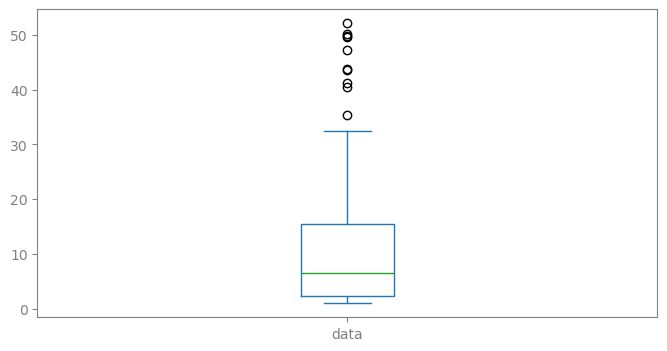

In [377]:
df.plot.box()

<font color='plum'> The boxplot is a better choice for the administrator; it shows that the top 25% of drugs cost between approximately $23 and $52.

#### Comparing the Plots
The <u>histogram</u> shows the shape of the data's distribution. Most of the drugs are clustered at the lower end of the price range, with fewer drugs at the higher end. 


The <u>boxplot</u> is better for statistical summaries; it lets us see how the prices of the more expensive drugs relate to the rest of the prices.


#### How to Improve the Boxplot
* Add a Title and Axis Labels
* Highlight the 75th Percentile
* Apply a color scheme like unique colors for box and whiskers or maybe a gradient to represent the price range.
* Add Annotations to display the values of the median, 75th percentile, and the maximum price. 

## 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: 
    - are the data what you expect?  
    - Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

### My functions

In [378]:
def explore_dataframe(df):
    """
    Display basic information, head, missing values, and statistical summary of a DataFrame.
    """
    print(f"Dataset Info:")
    df.info()
    print(f"\nDataFrame shape: {df.shape}")
    print(f"\nColumn names: {df.columns.tolist()}")

    # print(f"\nFirst 5 rows:\n{df.head()}")
    print(f"\nMissing values per column:\n{df.isnull().sum()}")
    print(f"\nStatistical summary:\n{df.describe(include='all')}")


In [379]:
def plot_numeric(data, feature, hue=None):
    """
    Generates a comprehensive set of plots for a numerical feature,
    with an option to segment by a categorical 'hue' feature.

    Args:
        data (pd.DataFrame): The dataframe containing the data.
        feature (str): The name of the numerical column to analyze.
        hue (str, optional): The name of the categorical column for color-encoding. Defaults to None.
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'Analysis of {feature}', fontsize=14)

    # Define common color arguments based on whether hue is provided
    color_args = {'palette': 'viridis'} if hue else {'color': "#9256A1"}
    
    # --- Create Plots using argument unpacking ---
    
    # Histogram
    sns.histplot(data=data, x=feature, hue=hue, kde=True, ax=axes[0, 0], bins=30, **color_args)
    axes[0, 0].set_title(f'Histogram of {feature}')

    # KDE Plot
    sns.kdeplot(data=data, x=feature, hue=hue, ax=axes[0, 1], **color_args)
    axes[0, 1].set_title(f'KDE Plot of {feature}')

    # Define specific arguments for box and violin plots
    box_violin_args = {'data': data, 'x': feature, 'orient': 'h'}
    if hue:
        box_violin_args['y'] = hue

    # Box Plot
    sns.boxplot(ax=axes[1, 0], **box_violin_args, **color_args)
    axes[1, 0].set_title(f'Box Plot of {feature}')

    # Violin Plot
    sns.violinplot(ax=axes[1, 1], **box_violin_args, **color_args)
    axes[1, 1].set_title(f'Violin Plot of {feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Statistics ---
    stats = data[feature].describe()
    modes = data[feature].mode()
    
    stats_dict = {
        'Mean': stats['mean'],
        'Median': stats['50%'],
        'Mode': ', '.join(map(str, modes.values)) if len(modes) > 1 else modes[0],
        'Min': stats['min'],
        'Max': stats['max'],
        'Range': stats['max'] - stats['min'],
        'IQR': stats['75%'] - stats['25%'],
        'Skewness': data[feature].skew(),
        'Kurtosis': data[feature].kurtosis()
    }
    
    stats_df = pd.DataFrame(stats_dict, index=[feature]).T
    # print(f"\nDescriptive Stats for {feature}:")
    print(stats_df.round(3))


In [380]:
def plot_categorical(data, feature, hue=None):
    """
    Generates a count plot and a horizontal bar plot for a categorical feature,
    with an option to segment by a categorical 'hue' feature.

    Args:
        data (pd.DataFrame): The dataframe containing the data.
        feature (str): The name of the categorical column to analyze.
        hue (str, optional): The name of the categorical column for color-encoding. Defaults to None.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle(f'{feature}', fontsize=14)

    # Count Plot
    ax1 = sns.countplot(x=feature, data=data, hue=hue, ax=axes[0], palette="viridis")
    axes[0].set_title(f'Count Plot of {feature}')
    axes[0].tick_params(axis='x', rotation=45)

    # Add count labels
    # for p in ax1.patches:
    #     ax1.annotate(f'{p.get_height():.0f}',
    #                  (p.get_x() + p.get_width() / 2., p.get_height()),
    #                  ha='center', va='center',
    #                  xytext=(0, 5),
    #                  textcoords='offset points')

    # Horizontal Bar Chart (Percentage)
    value_counts = data[feature].value_counts(normalize=True).mul(100).sort_values()

    # Using a single dark color from the start of the viridis palette for consistency and readability
    ax2 = sns.barplot(x=value_counts.values, y=value_counts.index, orient='h', ax=axes[1], color="#440154")
    axes[1].set_title(f'% Distribution of {feature}')
    # axes[1].set_xlabel('Percentage (%)')
    
    # Add percentage labels
    for index, value in enumerate(value_counts):
        ax2.text(value, index, f'{value:.1f}%', color='white', ha='right', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    print(f"\nValue counts for {feature}:")
    print(data[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


###  <font color='plum'> 3.1. Hypertension Risk Prediction Dataset

Includes lifestyle, demographic, and clinical data (e.g., BMI, cholesterol, stress,
salt intake, smoking, family history) from individuals across multiple countries. It is
labeled for classification tasks (low vs. high risk of hypertension).
https://www.kaggle.com/datasets/ankushpanday1/hypertension-risk-prediction-dataset

#### Load

In [381]:

file_path = "ankushpanday1/hypertension-risk-prediction-dataset"
file_name = "hypertension_dataset.csv"

df_1 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  file_path,
  file_name,
)
df_1.columns = df_1.columns.str.strip() 
df_1.head()

/var/folders/z_/3w4wn_0x6c36h1pzzf2nkpj40000gn/T/ipykernel_77988/2800247292.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_1 = kagglehub.load_dataset(


Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1          80  100   75             72      179  Female   
1            9.8          56   77   47             90      113    Male   
2            5.2          75  162   56             81      101    Male   
3            7.5          71  164   93             94      199  Female   
4            5.0          52  108   74            226      157  Female   

   Education_Level  Employment_Status Hypertension  
0          Primary         Unemployed         High  
1        Secondary         Unemployed         High  
2          Primary           Employed          Low  
3        Secondary            Retired         High  
4          Primary           Employed         High  

[5 rows x 23 columns]

#### <font color='plum'>Descriptive Info

In [382]:
explore_dataframe(df_1)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  flo

In [383]:
target_col = 'Hypertension'
categorical_cols    = ['Country', 'Smoking_Status', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']
numeric_cols        = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']
len(categorical_cols), len(numeric_cols)

for col in categorical_cols:
    print(f'{col}: {df_1[col].unique()},\n{df_1[col].nunique()} unique values\n')

Country: ['UK' 'Spain' 'Indonesia' 'Canada' 'France' 'South Korea' 'Brazil' 'China'
 'India' 'Italy' 'Germany' 'USA' 'Argentina' 'Australia' 'Saudi Arabia'
 'Russia' 'Japan' 'Turkey' 'Mexico' 'South Africa'],
20 unique values

Smoking_Status: ['Never' 'Current' 'Former'],
3 unique values

Physical_Activity_Level: ['Low' 'High' 'Moderate'],
3 unique values

Family_History: ['Yes' 'No'],
2 unique values

Diabetes: ['Yes' 'No'],
2 unique values

Gender: ['Female' 'Male'],
2 unique values

Education_Level: ['Primary' 'Secondary' 'Tertiary'],
3 unique values

Employment_Status: ['Unemployed' 'Employed' 'Retired'],
3 unique values

Hypertension: ['High' 'Low'],
2 unique values



#### <font color='plum'>Numeric Feature Analysis

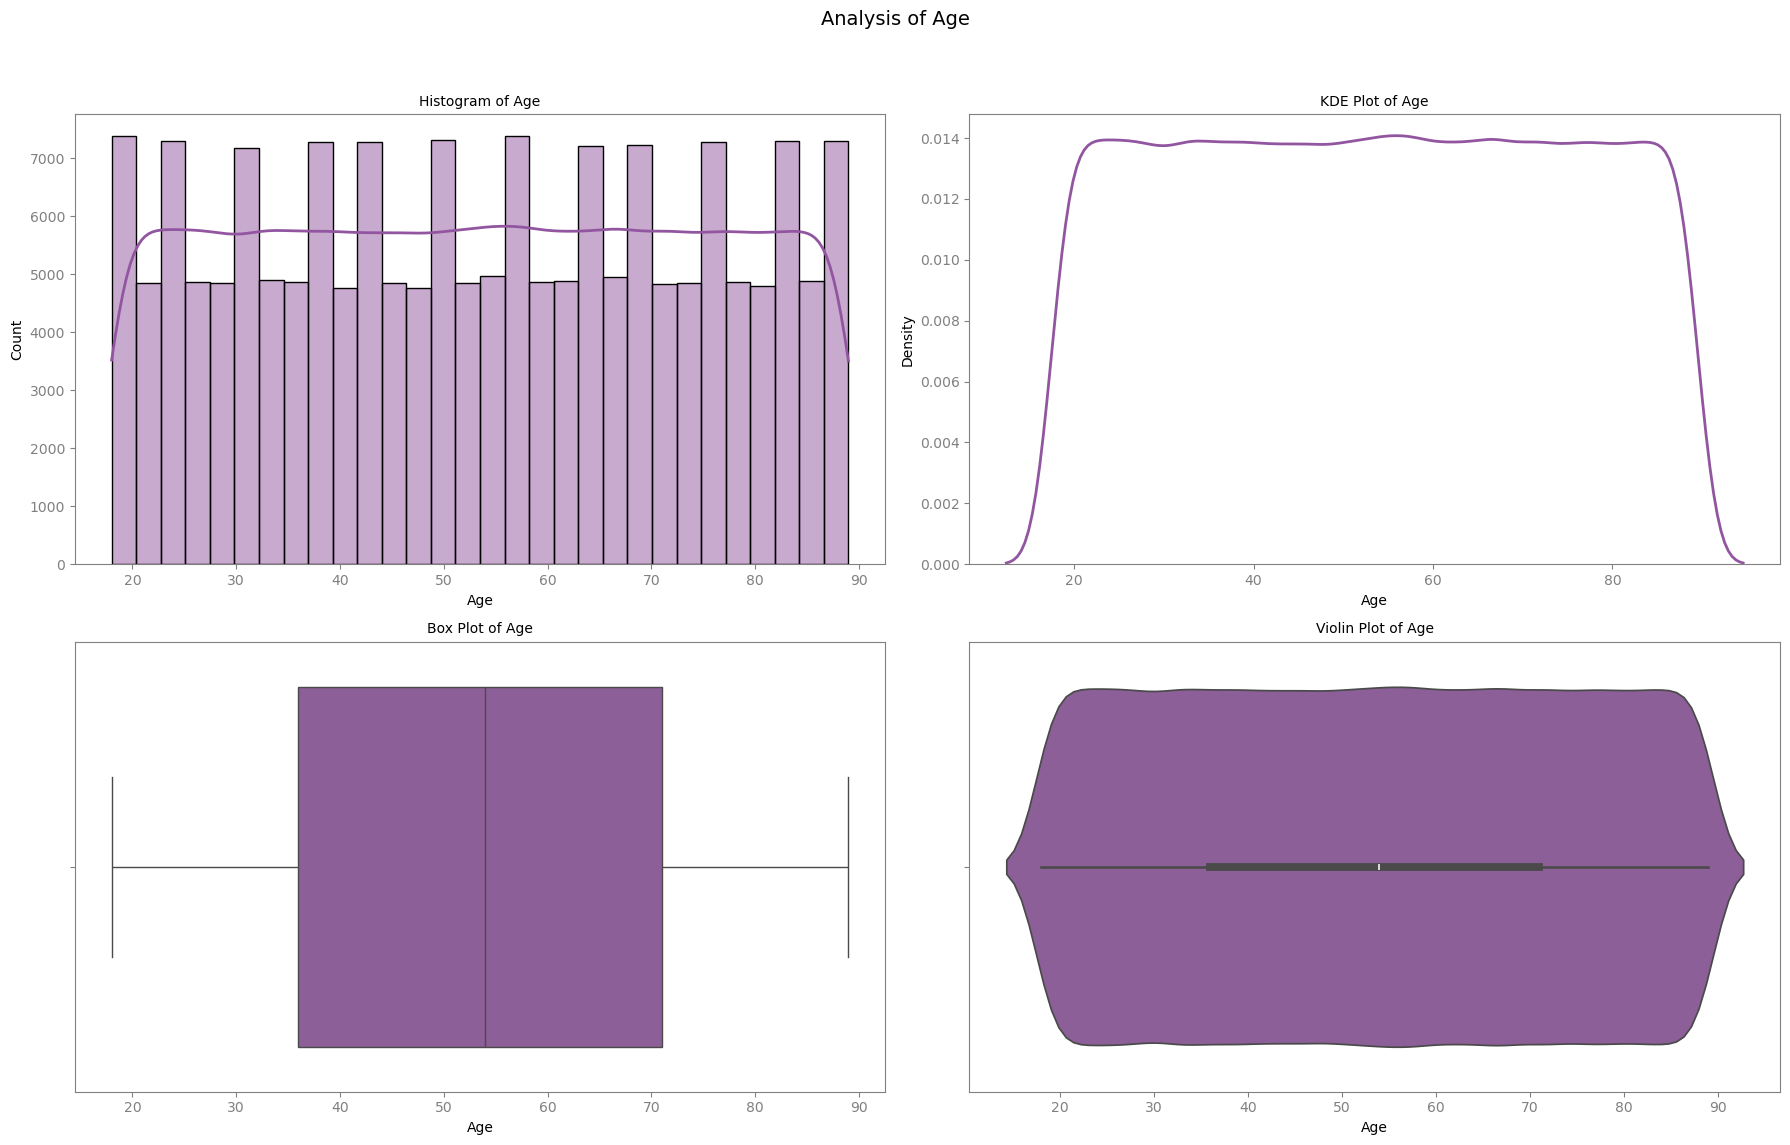

             Age
Mean      53.493
Median    54.000
Mode      73.000
Min       18.000
Max       89.000
Range     71.000
IQR       35.000
Skewness  -0.001
Kurtosis  -1.199


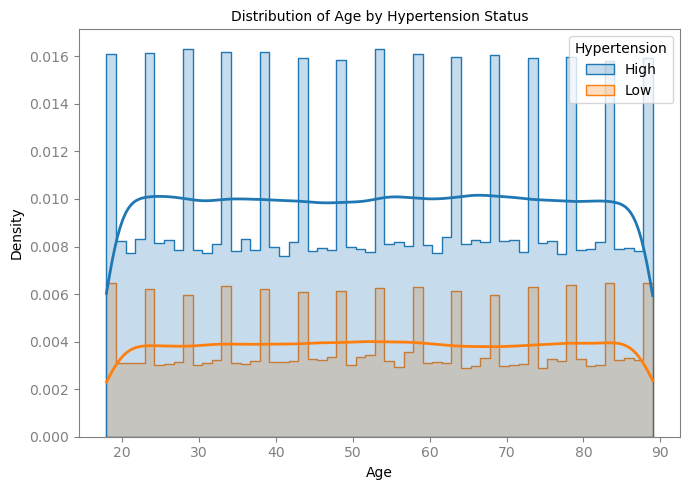

_________________________________________________________________________________________________________________________________



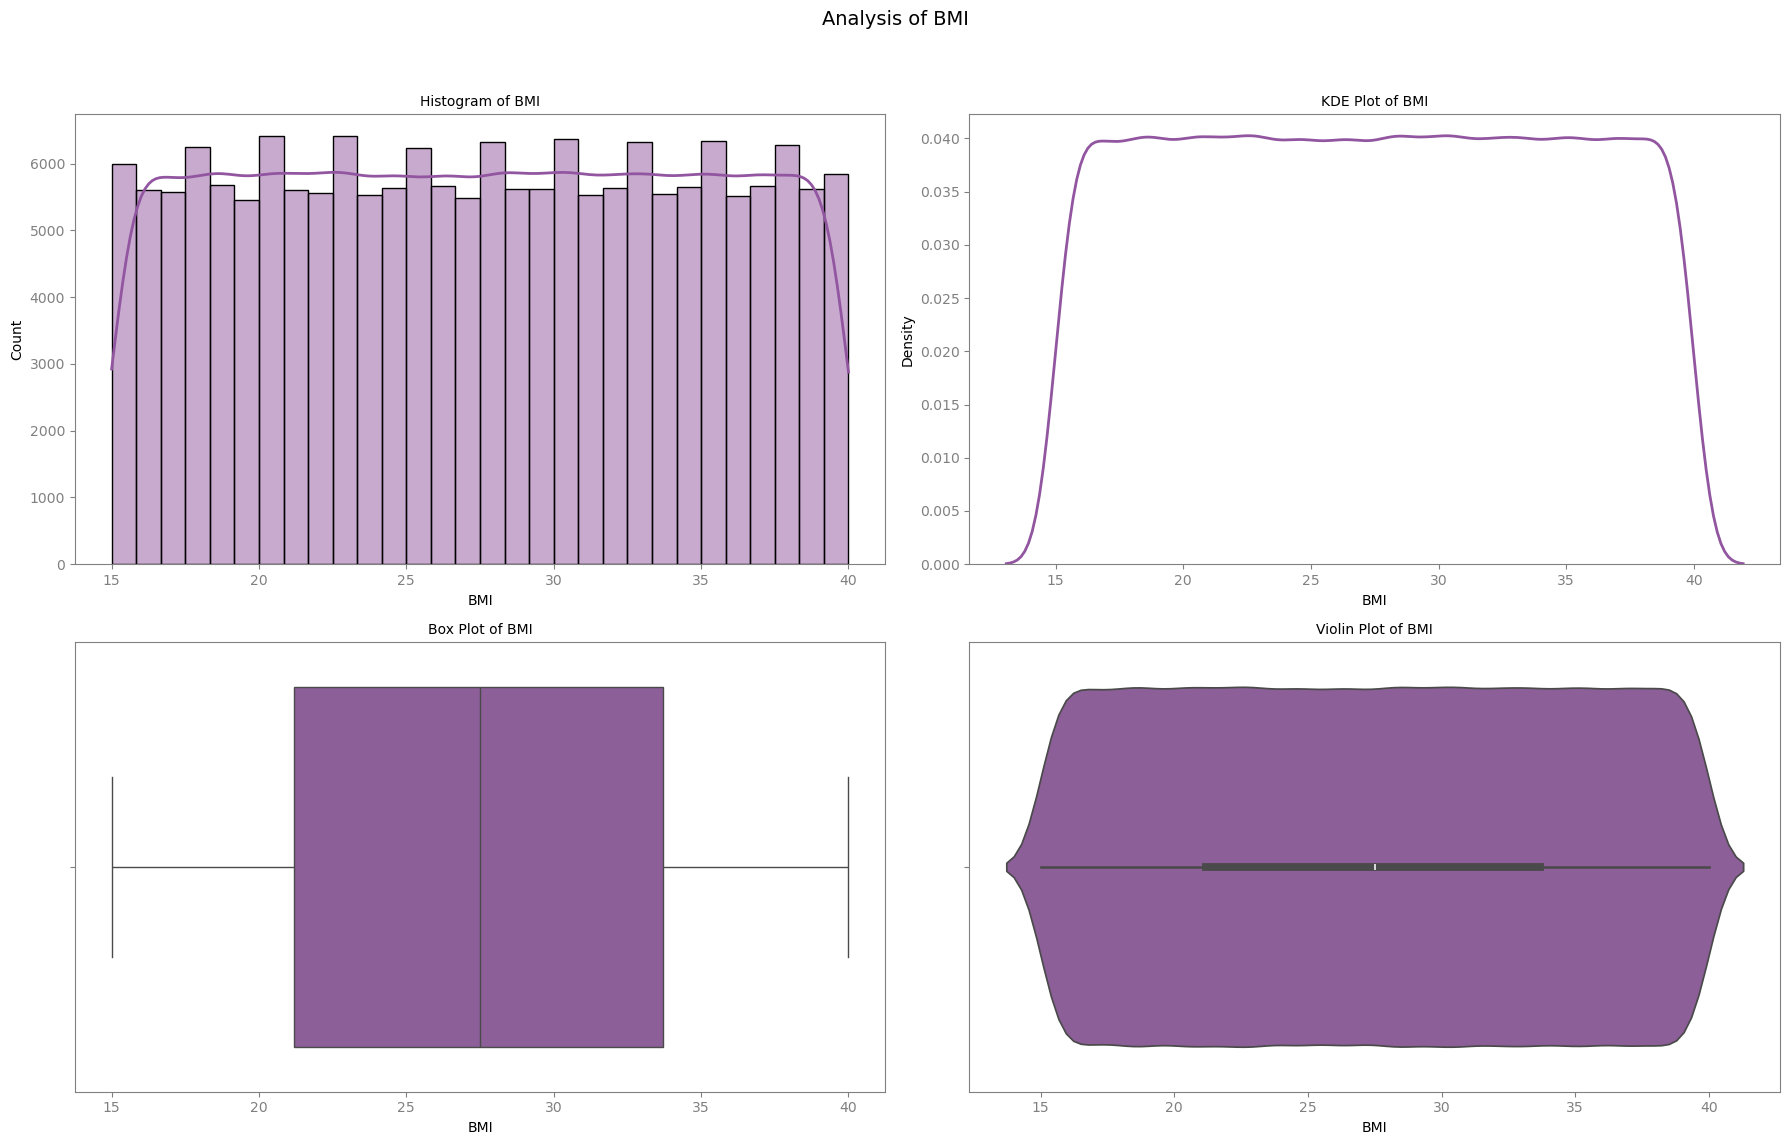

             BMI
Mean      27.495
Median    27.500
Mode      22.500
Min       15.000
Max       40.000
Range     25.000
IQR       12.500
Skewness  -0.000
Kurtosis  -1.200


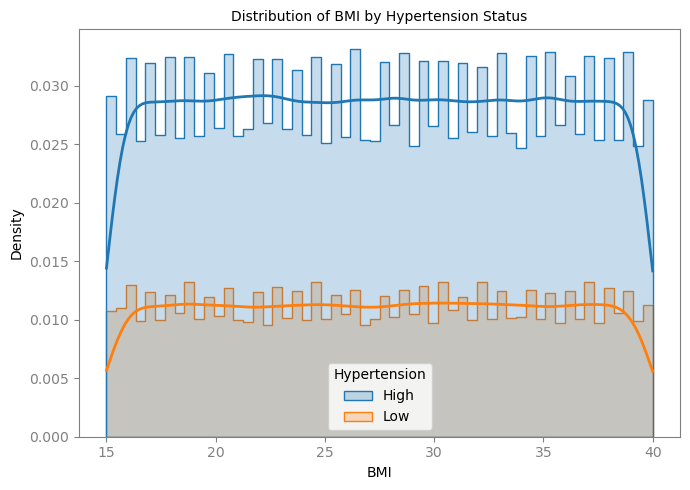

_________________________________________________________________________________________________________________________________



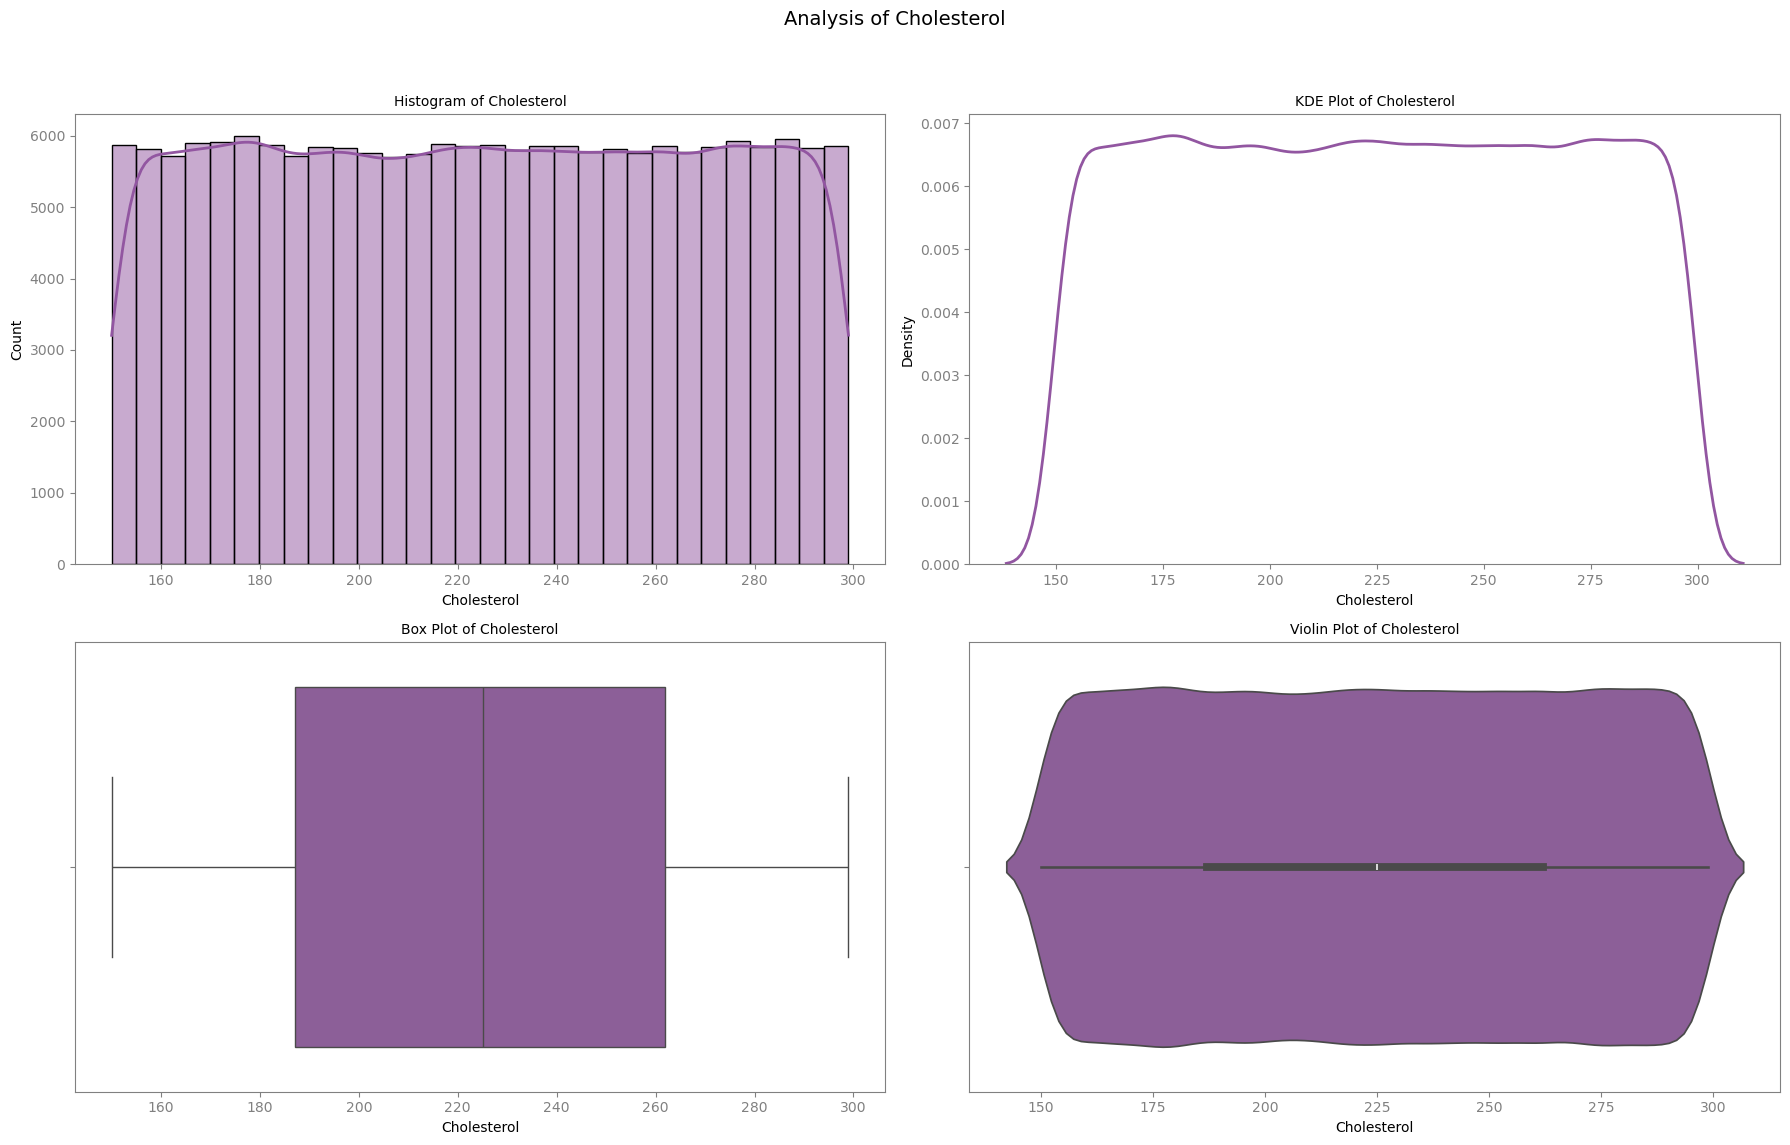

          Cholesterol
Mean          224.539
Median        225.000
Mode          178.000
Min           150.000
Max           299.000
Range         149.000
IQR            75.000
Skewness       -0.001
Kurtosis       -1.204


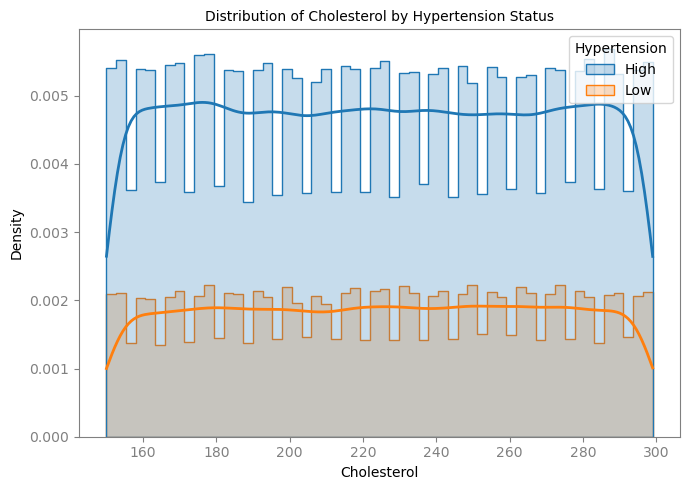

_________________________________________________________________________________________________________________________________



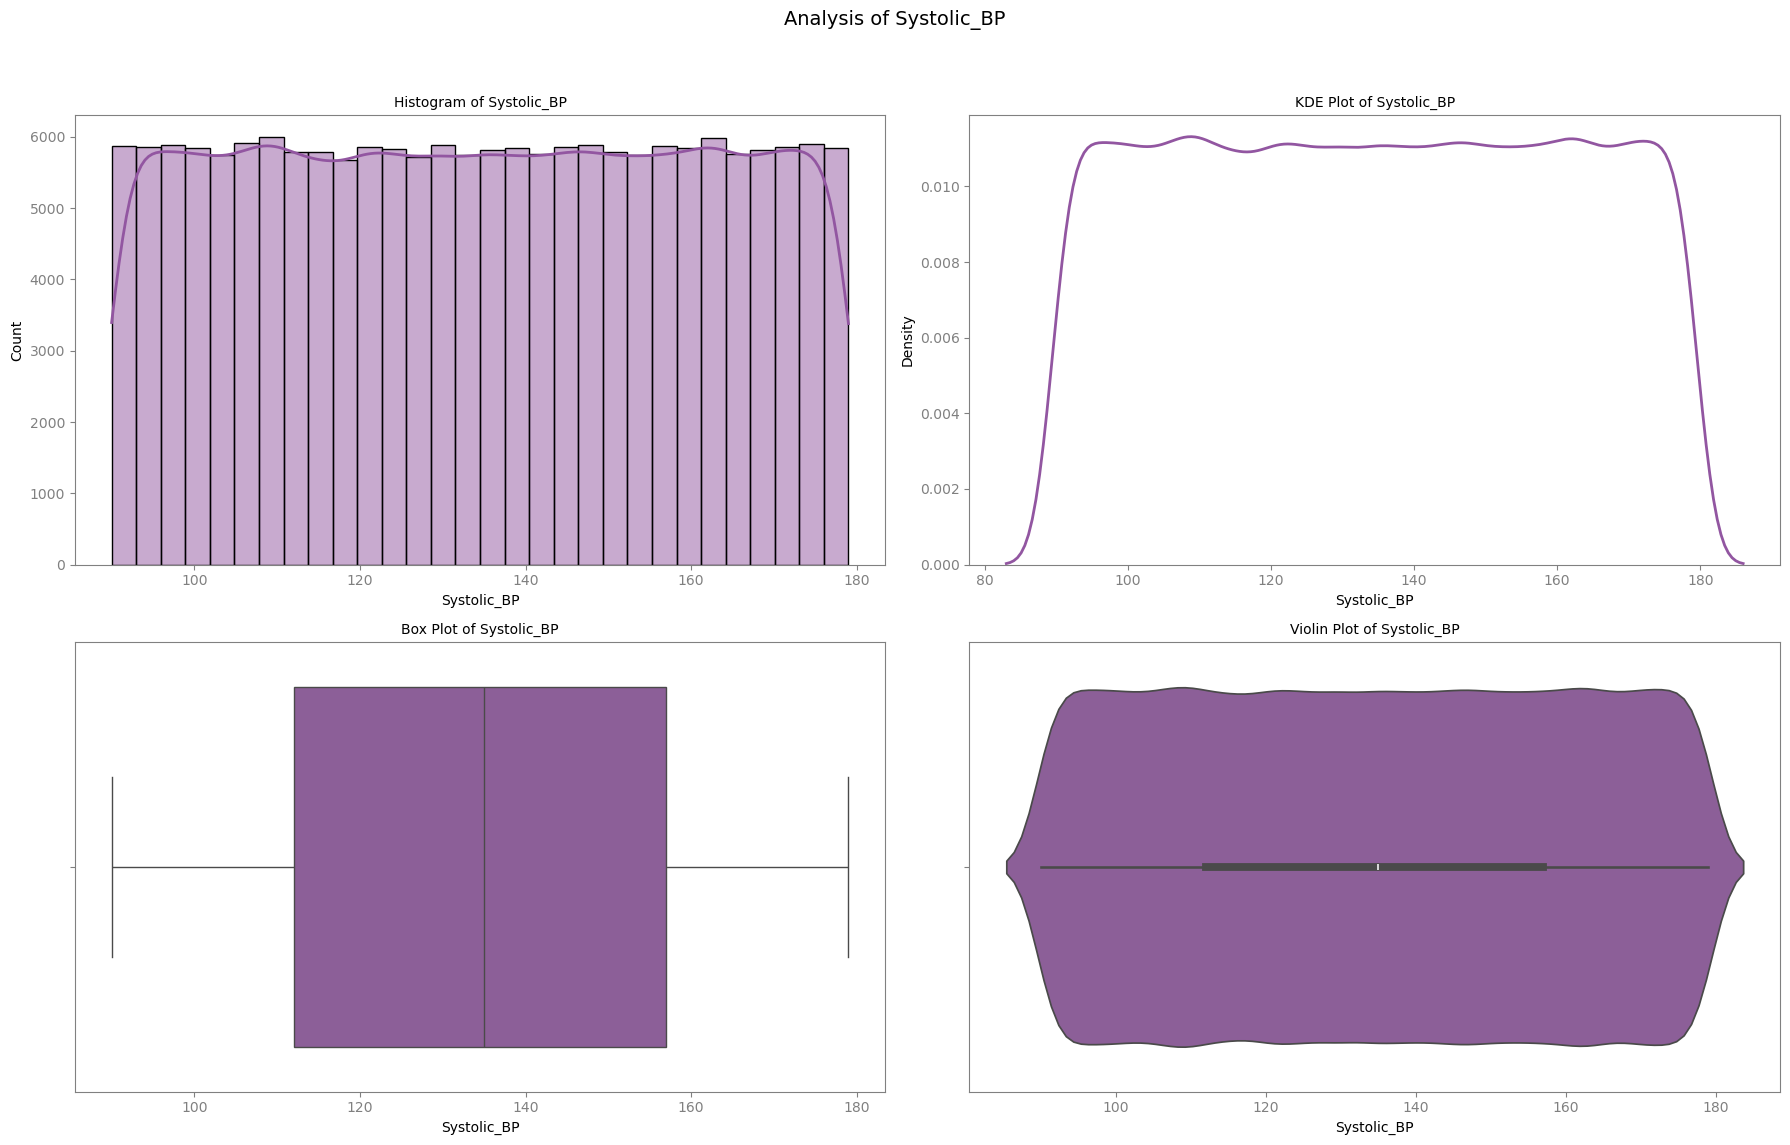

          Systolic_BP
Mean          134.505
Median        135.000
Mode          174.000
Min            90.000
Max           179.000
Range          89.000
IQR            45.000
Skewness       -0.001
Kurtosis       -1.205


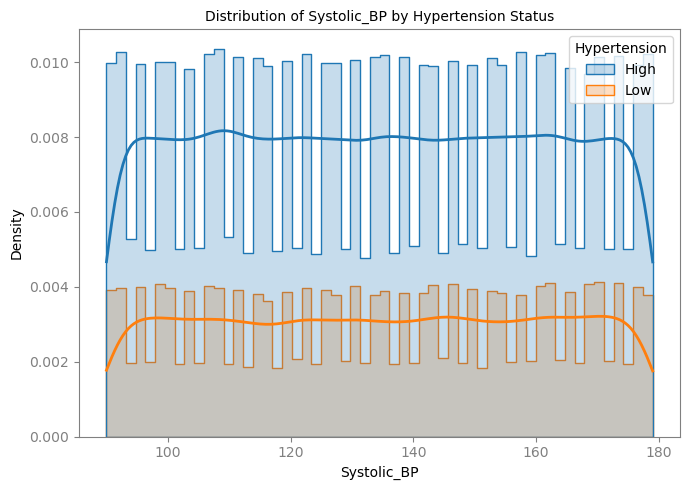

_________________________________________________________________________________________________________________________________



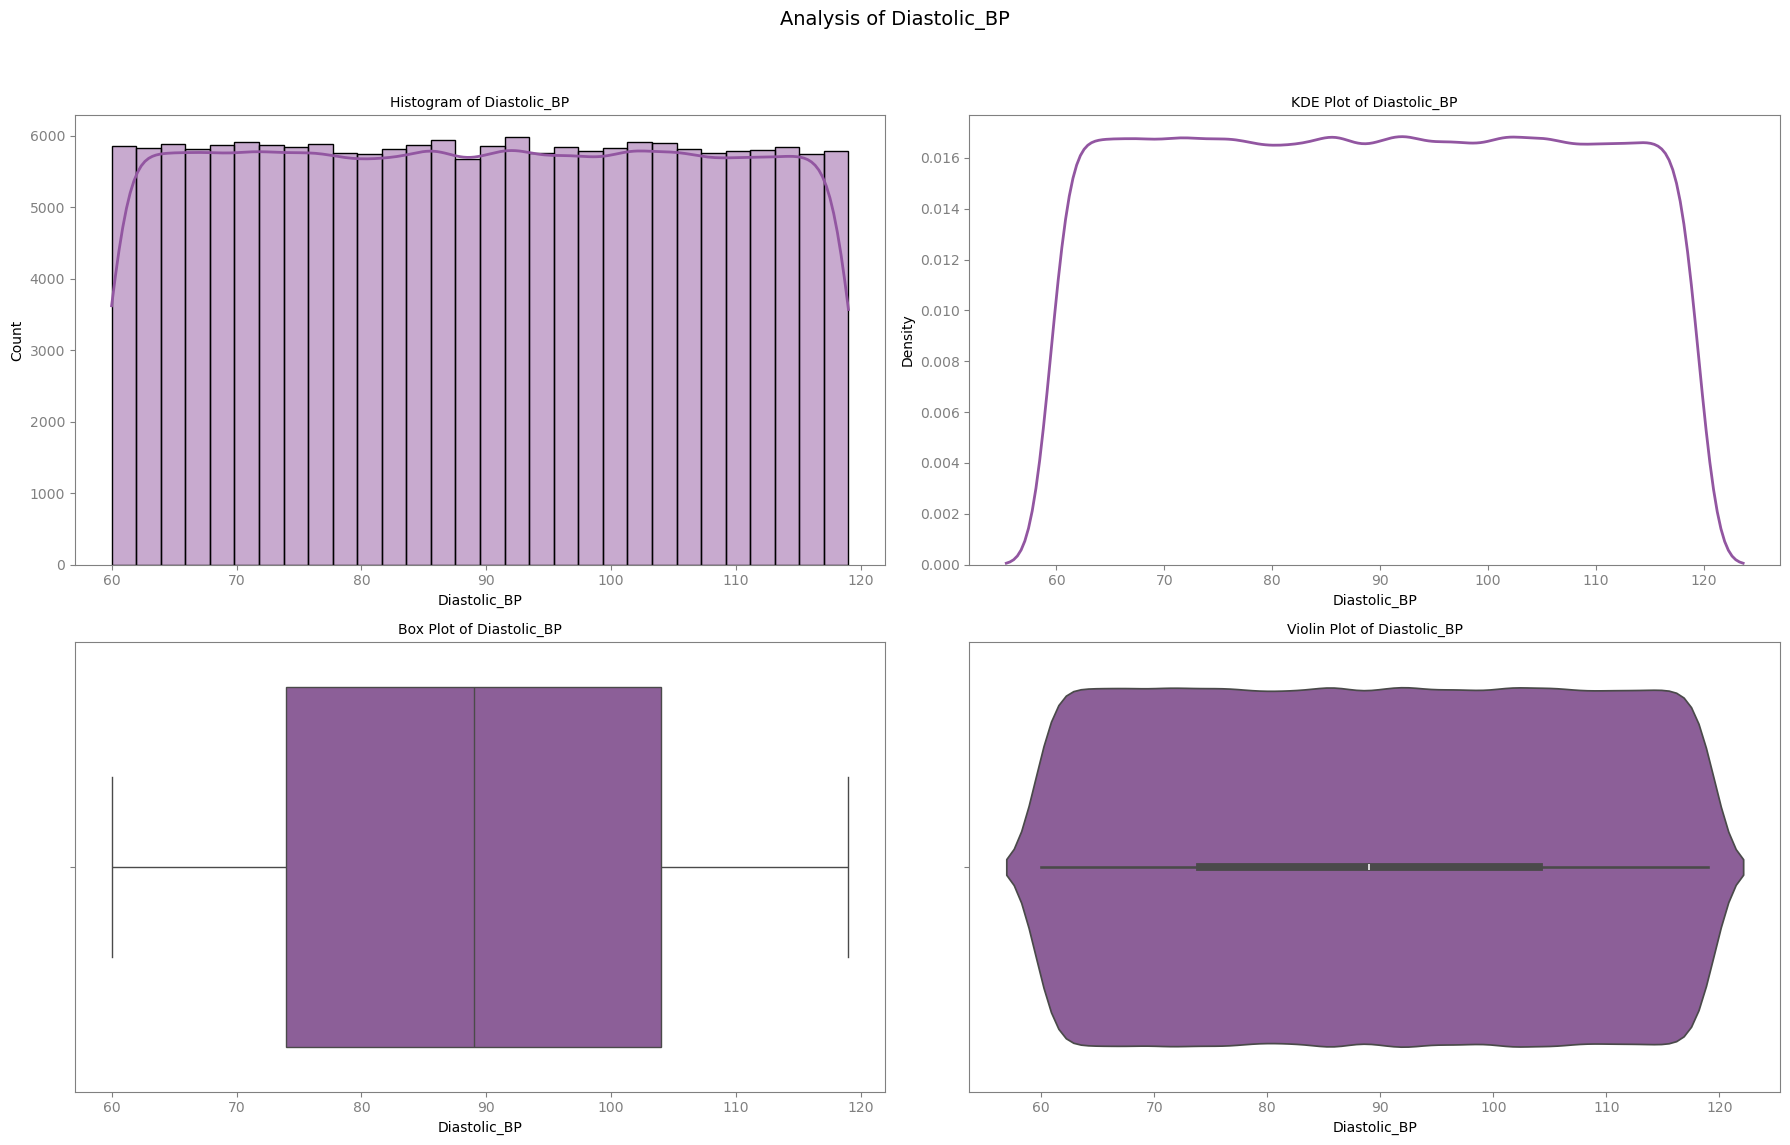

          Diastolic_BP
Mean            89.450
Median          89.000
Mode            85.000
Min             60.000
Max            119.000
Range           59.000
IQR             30.000
Skewness         0.002
Kurtosis        -1.200


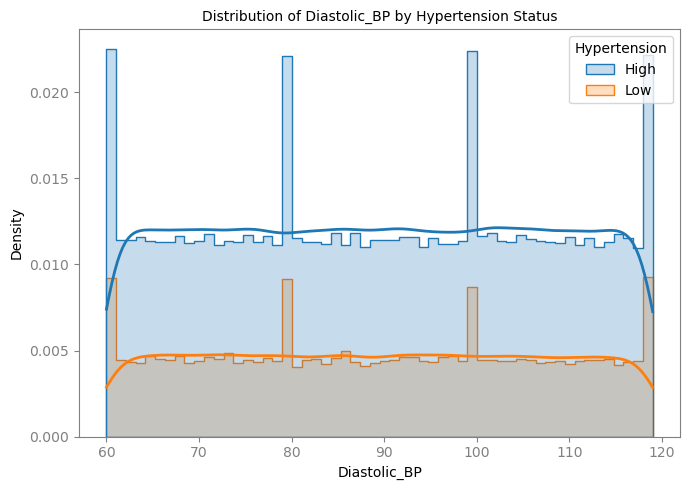

_________________________________________________________________________________________________________________________________



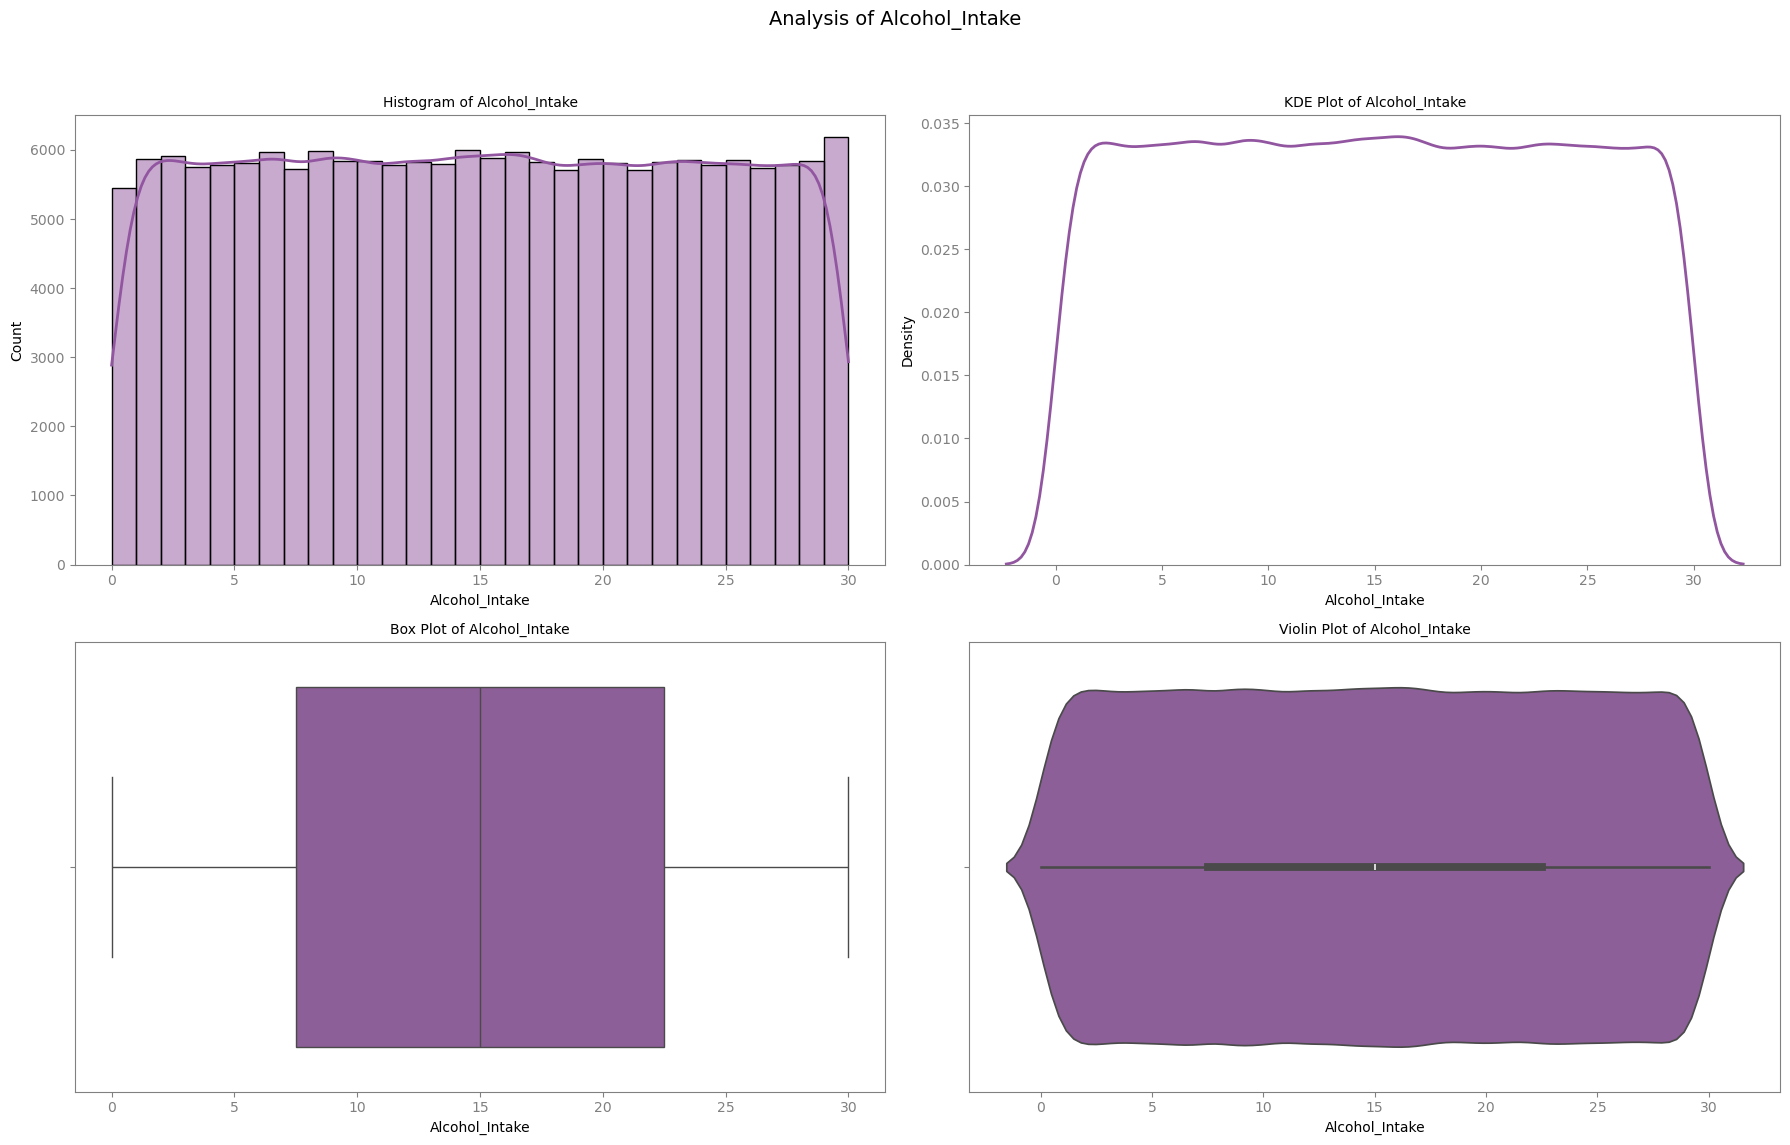

          Alcohol_Intake
Mean              14.991
Median            15.000
Mode               6.700
Min                0.000
Max               30.000
Range             30.000
IQR               15.000
Skewness           0.004
Kurtosis          -1.196


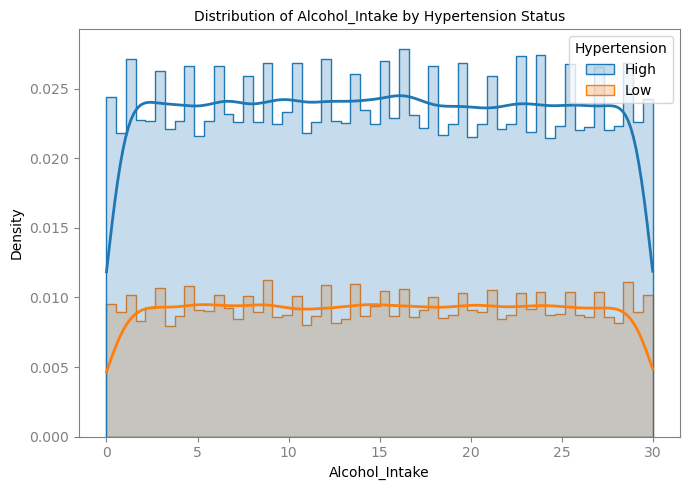

_________________________________________________________________________________________________________________________________



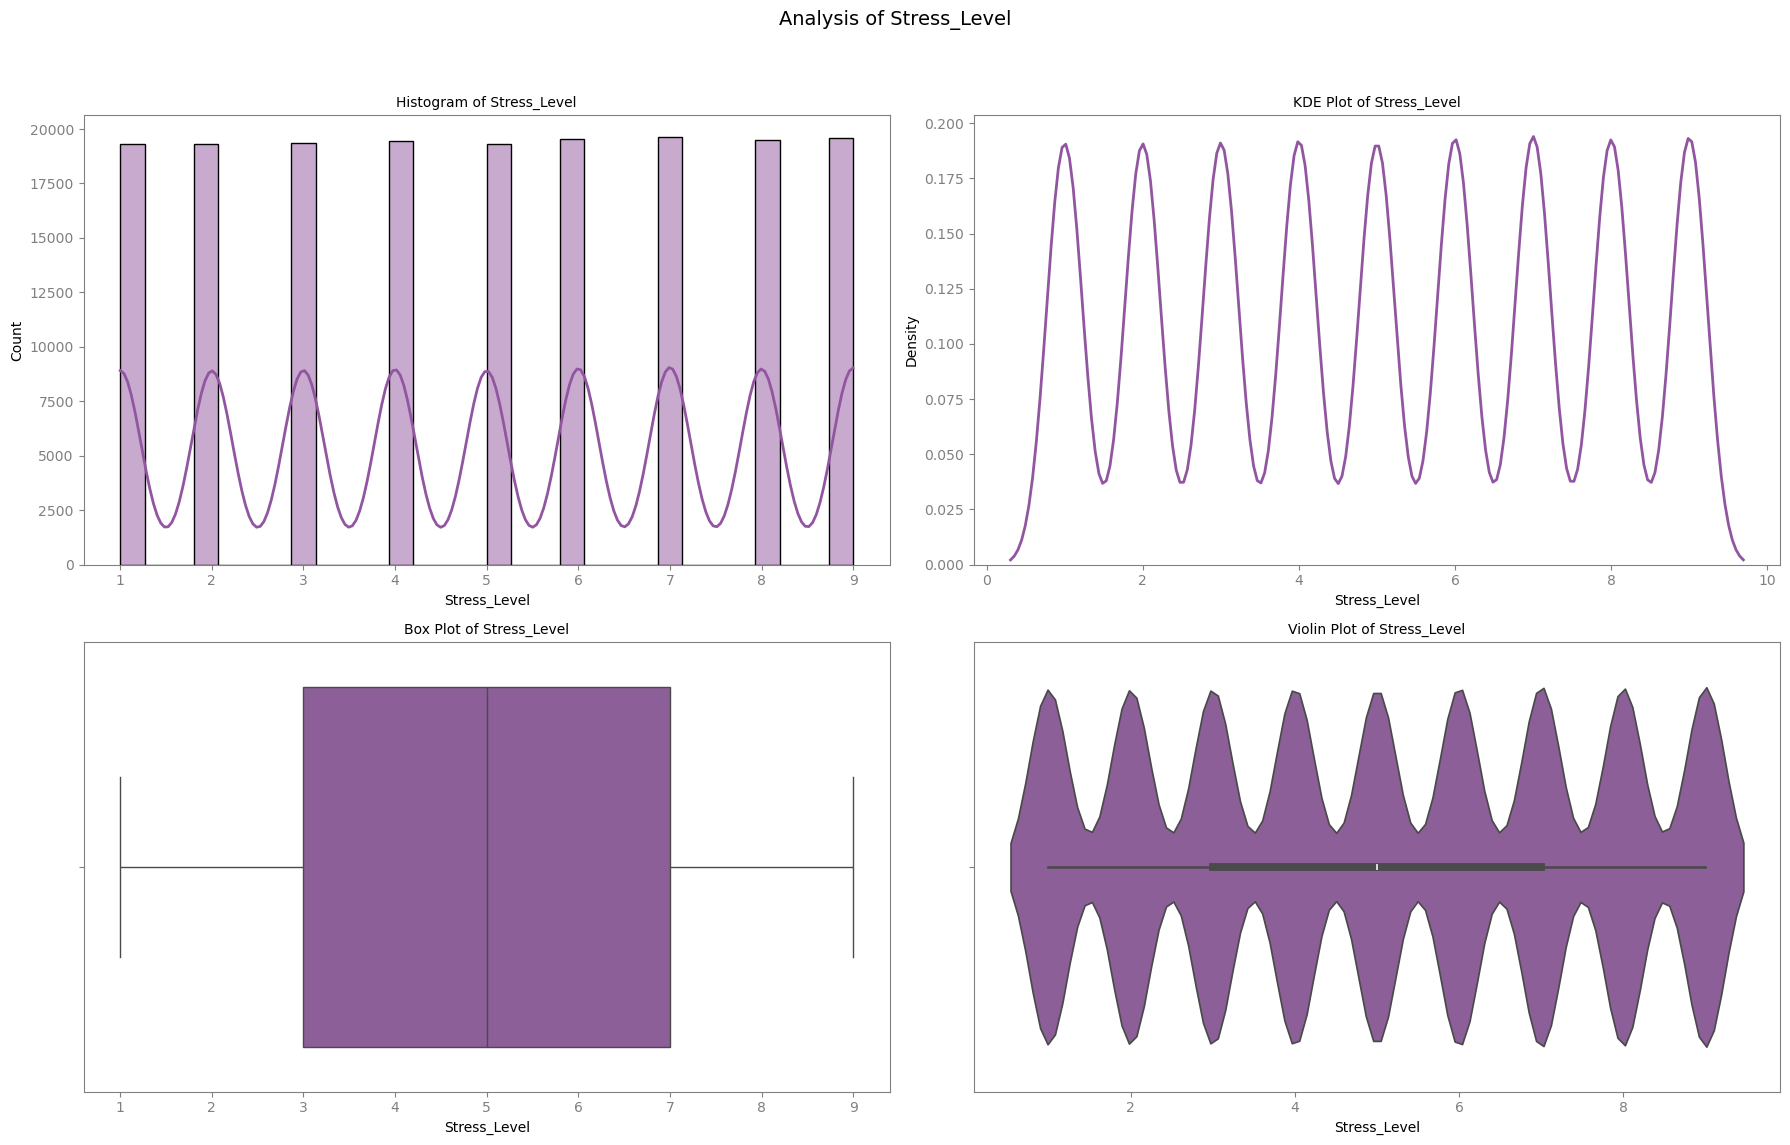

          Stress_Level
Mean             5.013
Median           5.000
Mode             7.000
Min              1.000
Max              9.000
Range            8.000
IQR              4.000
Skewness        -0.007
Kurtosis        -1.230


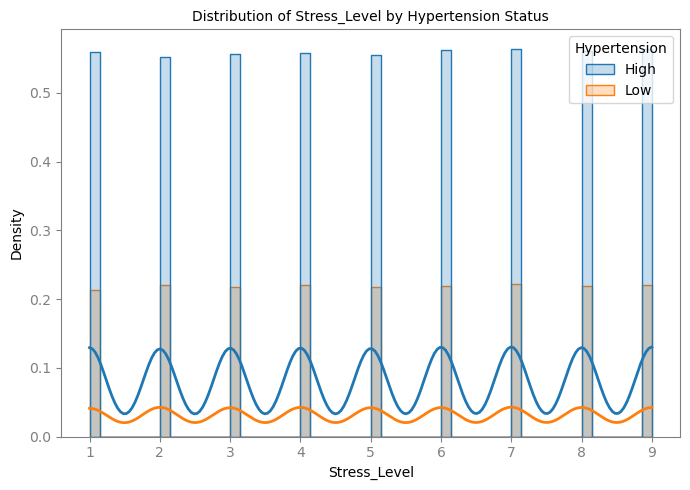

_________________________________________________________________________________________________________________________________



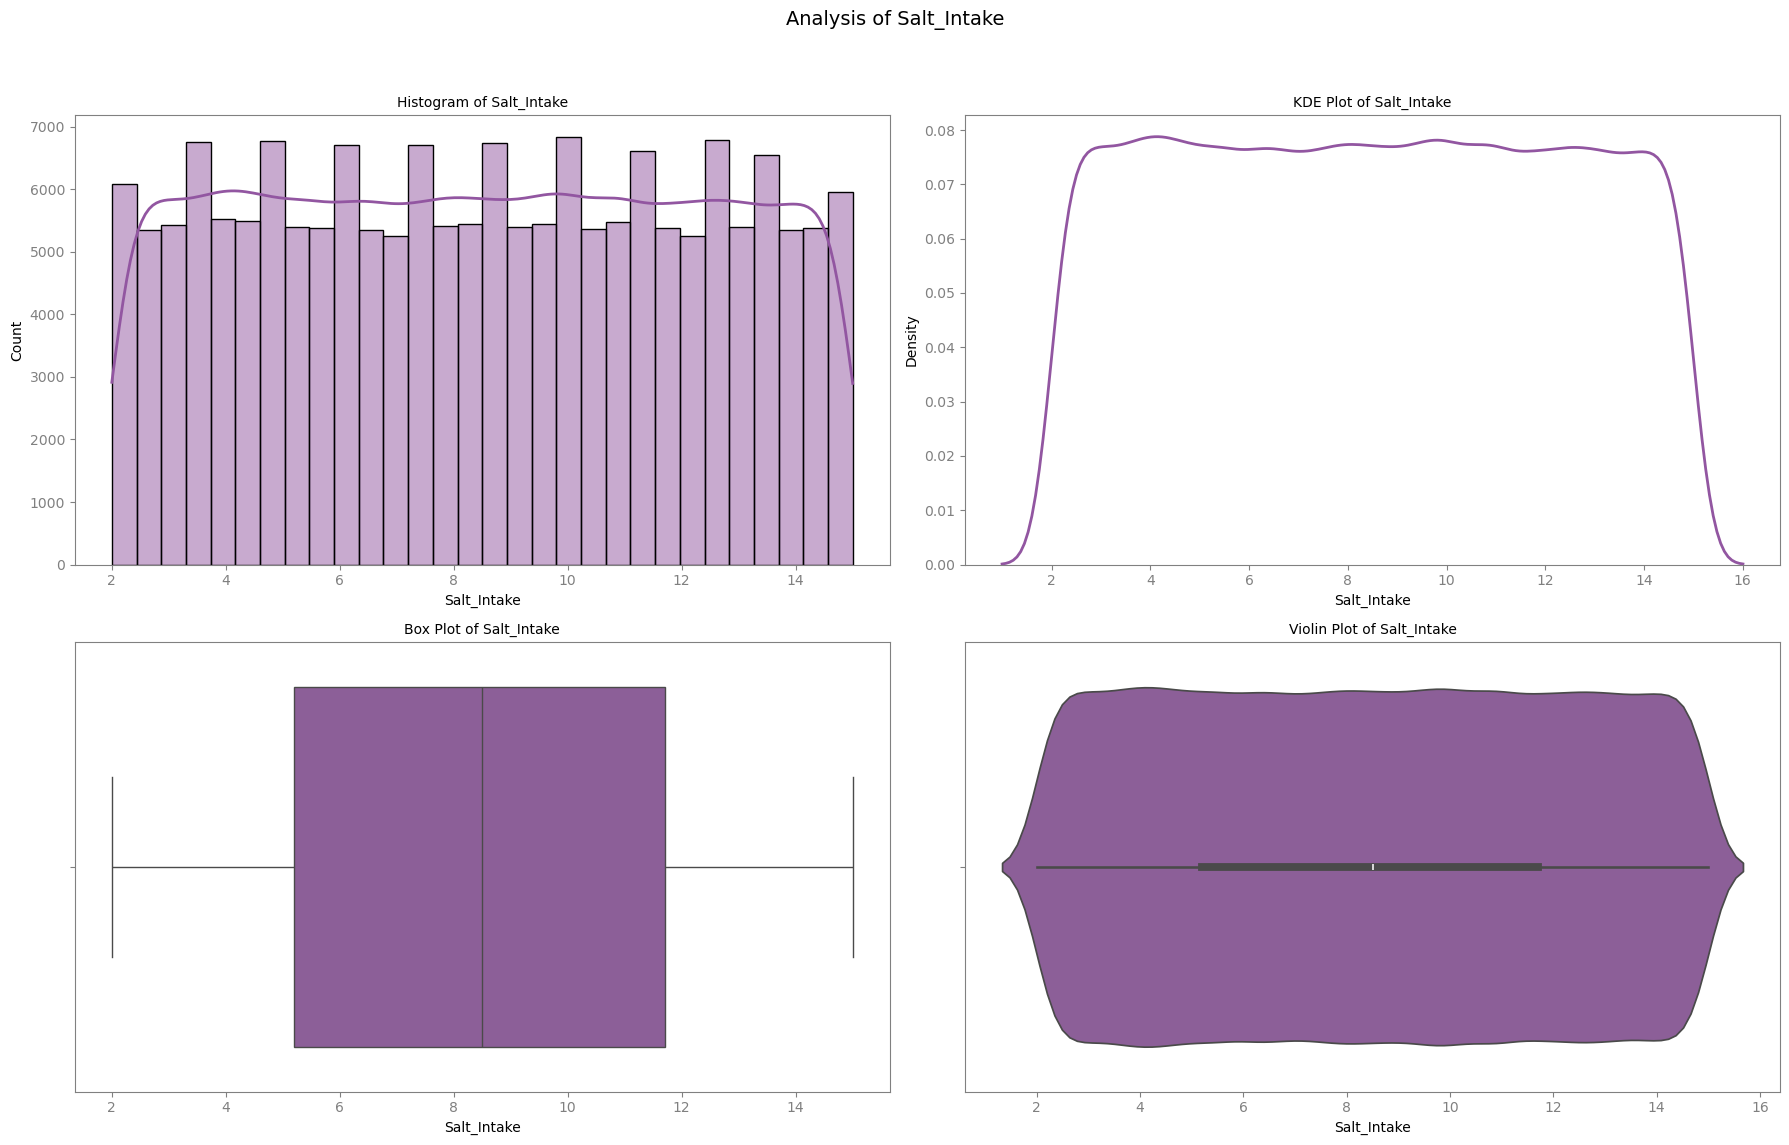

          Salt_Intake
Mean            8.483
Median          8.500
Mode            9.900
Min             2.000
Max            15.000
Range          13.000
IQR             6.500
Skewness        0.005
Kurtosis       -1.199


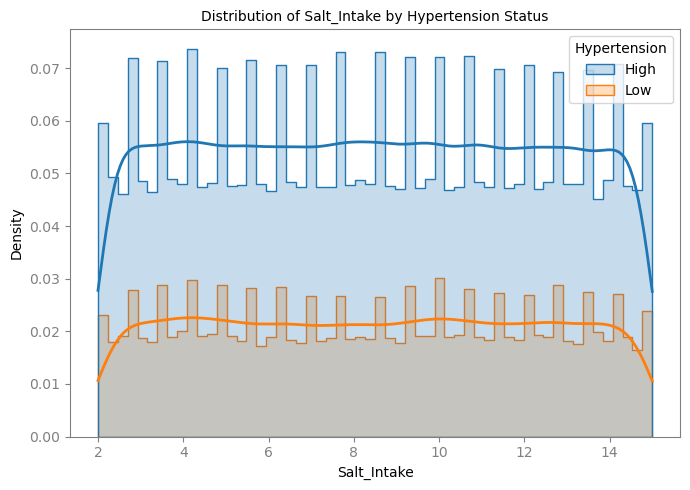

_________________________________________________________________________________________________________________________________



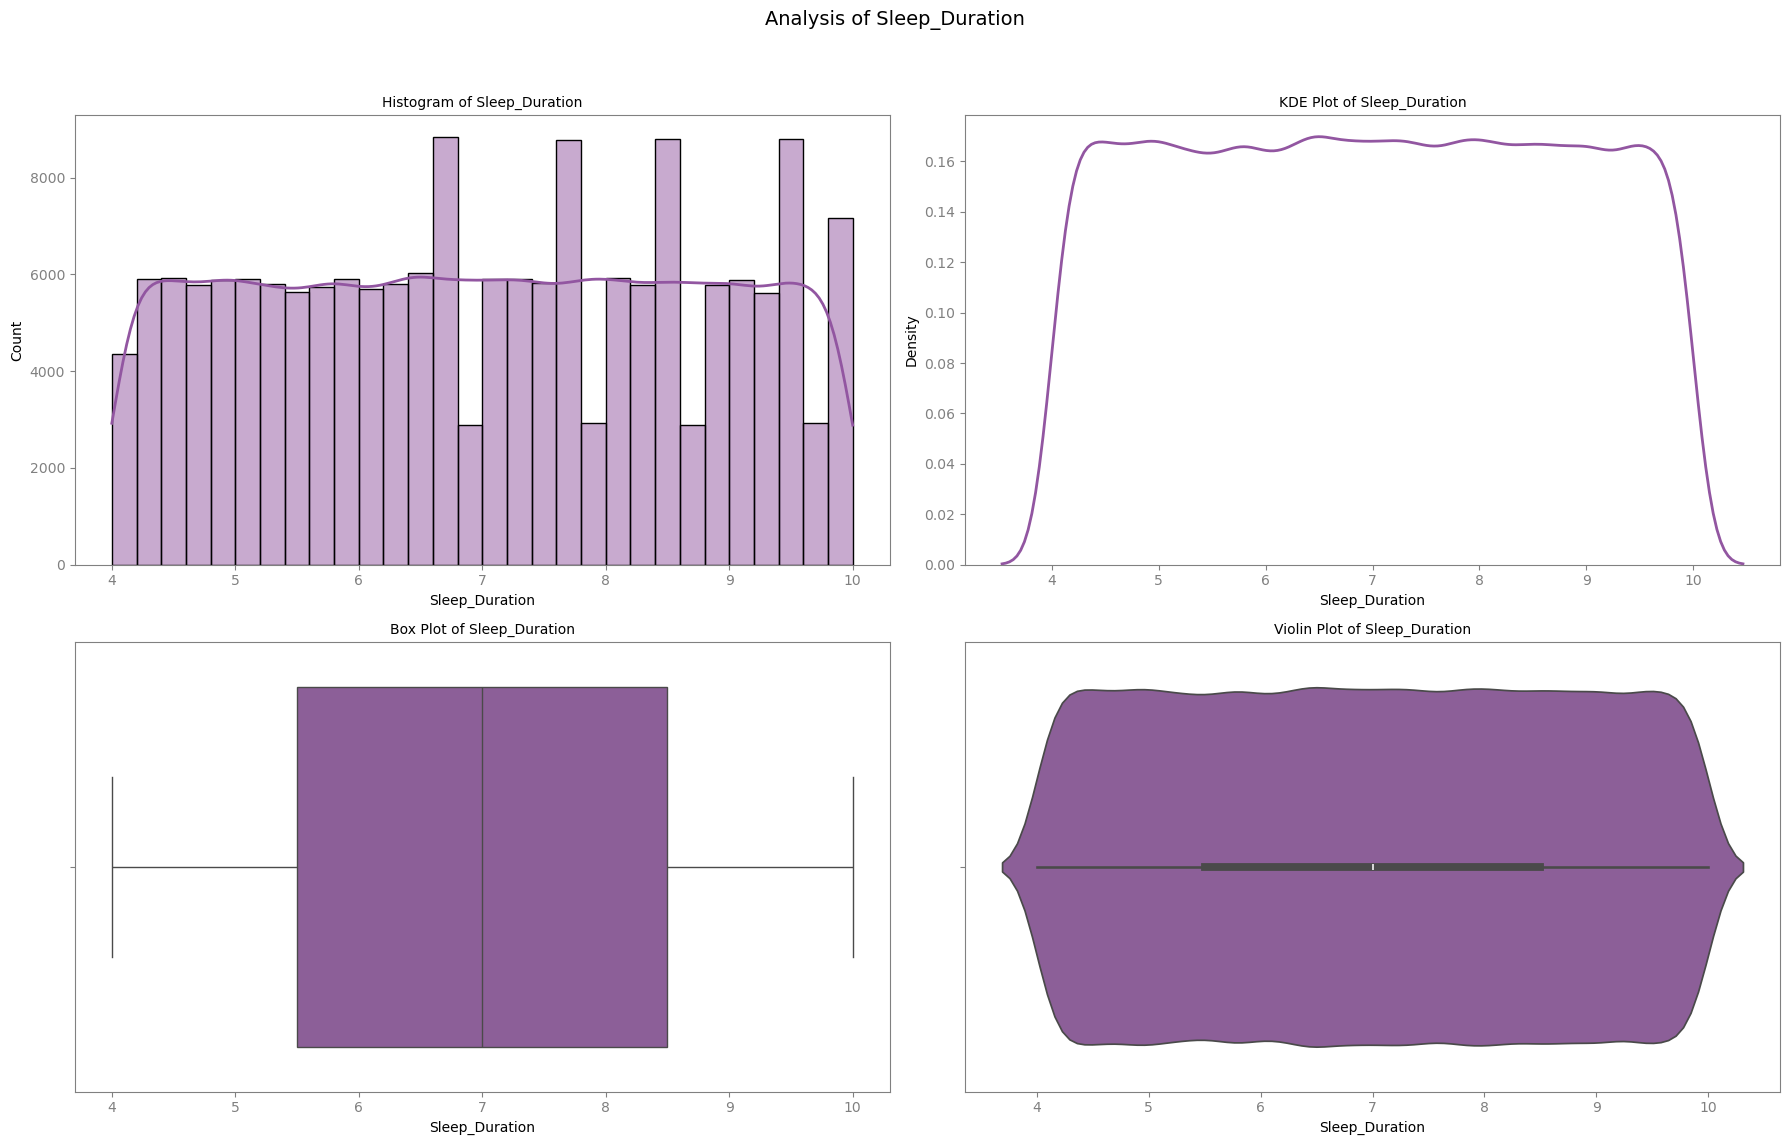

          Sleep_Duration
Mean               6.996
Median             7.000
Mode               6.500
Min                4.000
Max               10.000
Range              6.000
IQR                3.000
Skewness          -0.001
Kurtosis          -1.195


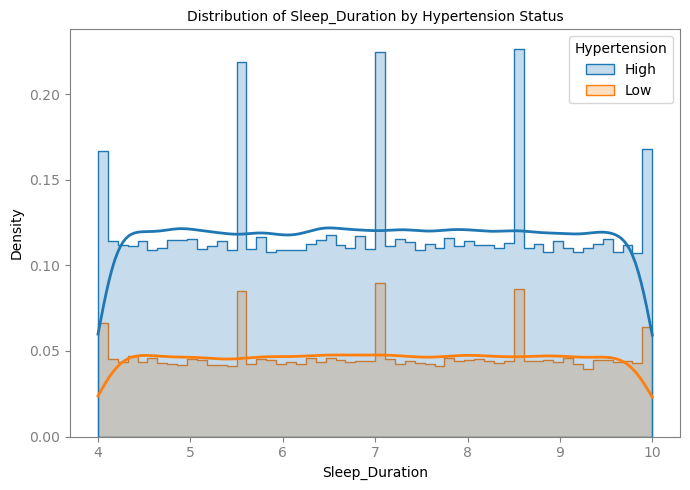

_________________________________________________________________________________________________________________________________



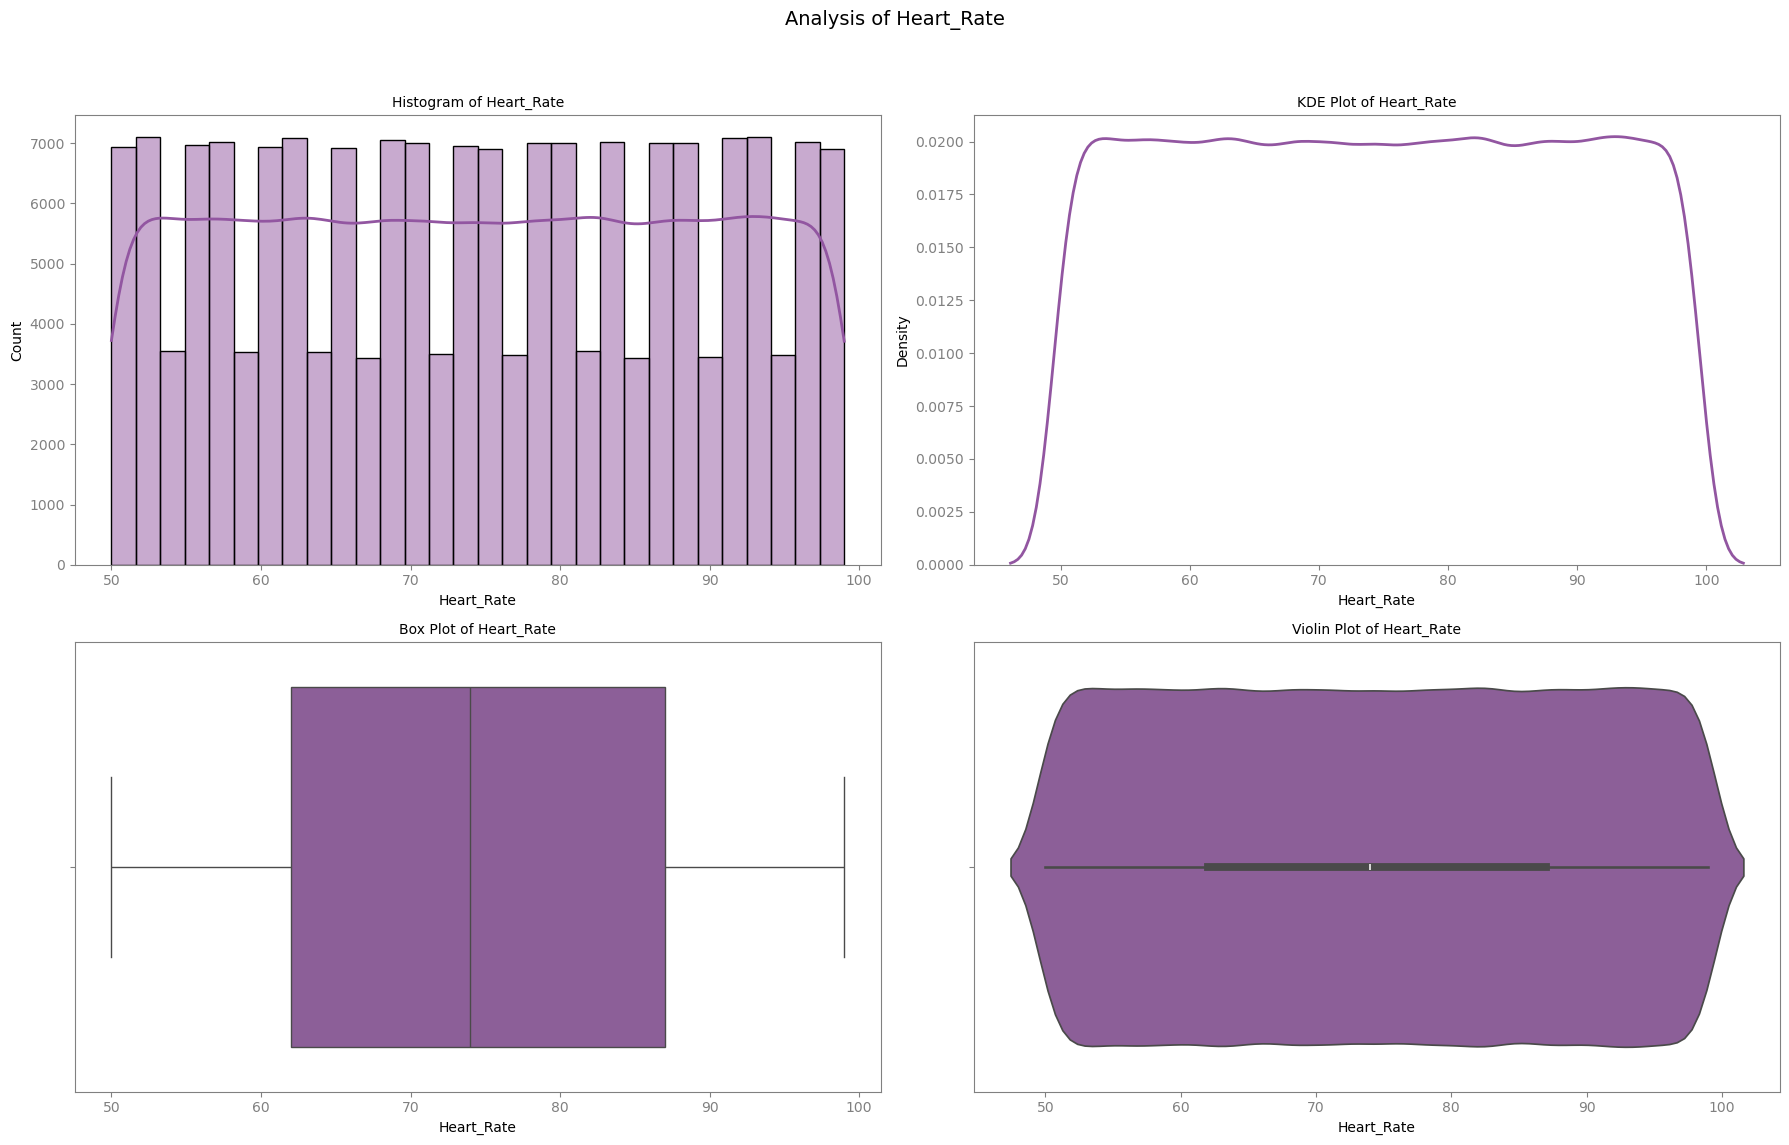

          Heart_Rate
Mean          74.495
Median        74.000
Mode          83.000
Min           50.000
Max           99.000
Range         49.000
IQR           25.000
Skewness      -0.000
Kurtosis      -1.204


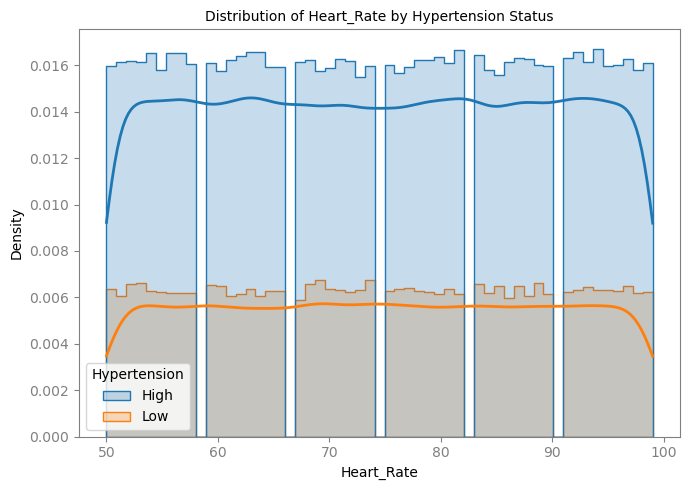

_________________________________________________________________________________________________________________________________



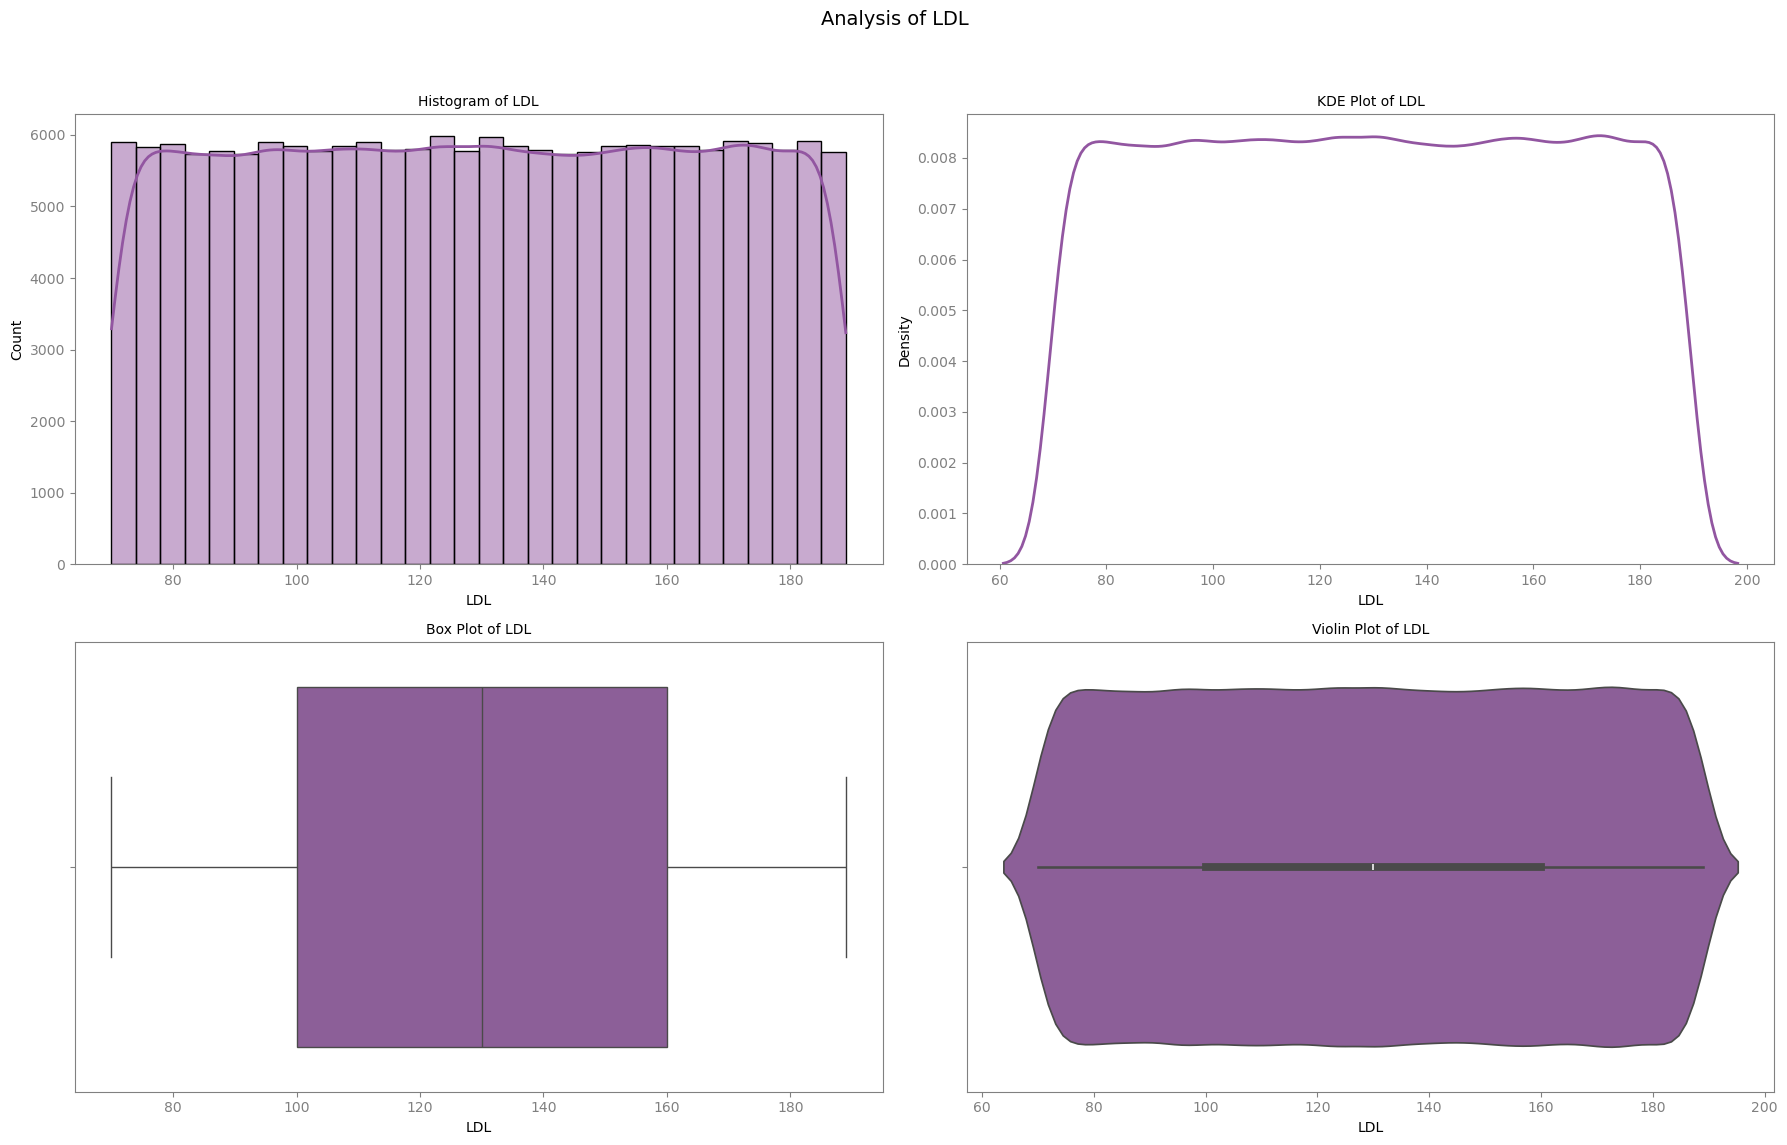

              LDL
Mean      129.528
Median    130.000
Mode       79.000
Min        70.000
Max       189.000
Range     119.000
IQR        60.000
Skewness   -0.002
Kurtosis   -1.199


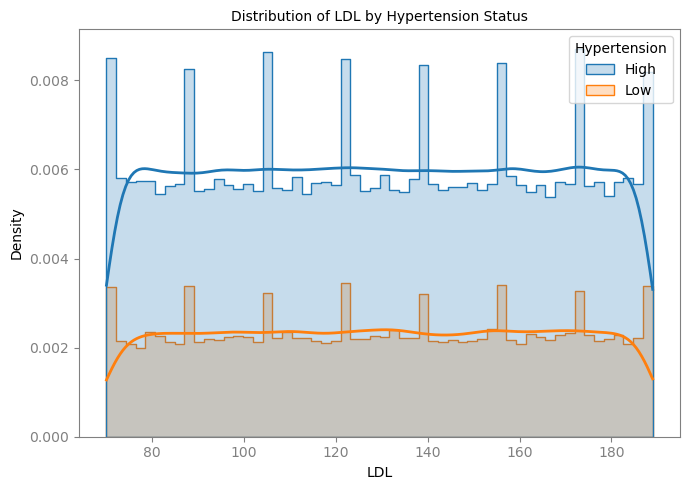

_________________________________________________________________________________________________________________________________



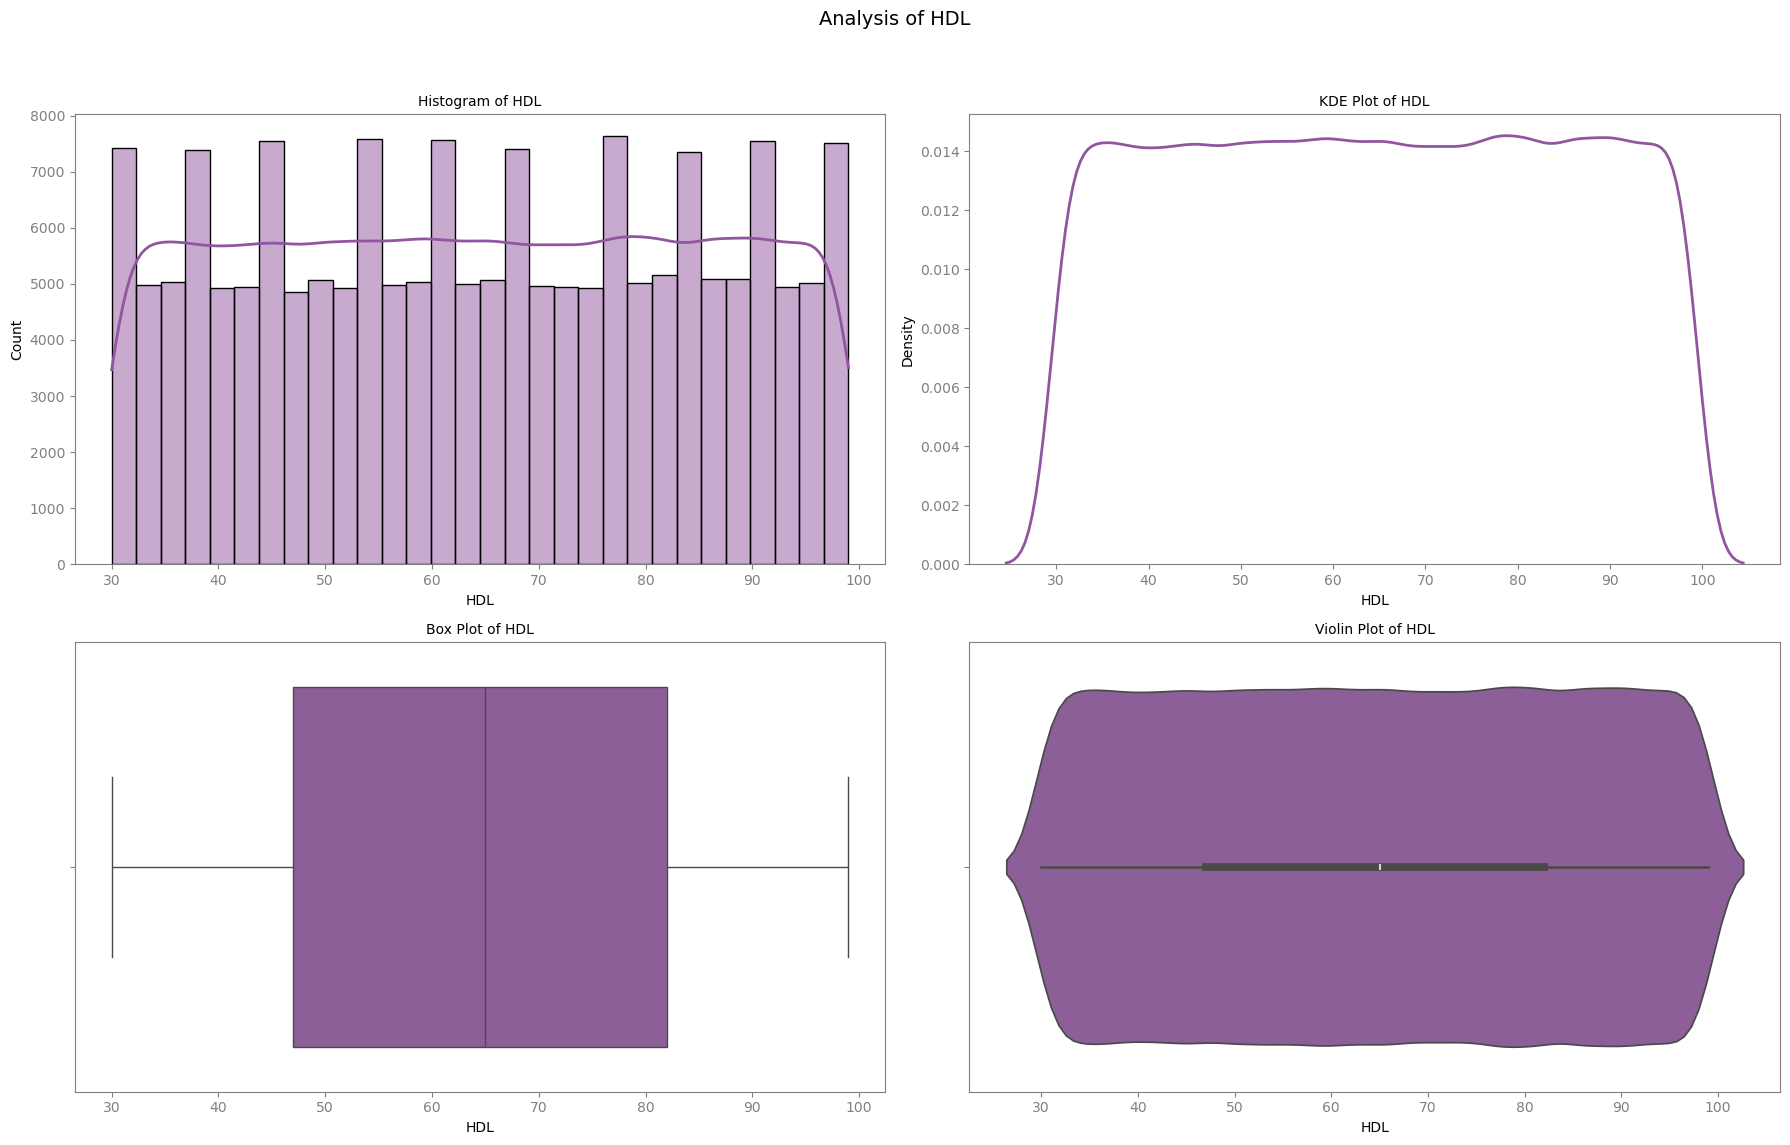

             HDL
Mean      64.573
Median    65.000
Mode      86.000
Min       30.000
Max       99.000
Range     69.000
IQR       35.000
Skewness  -0.005
Kurtosis  -1.200


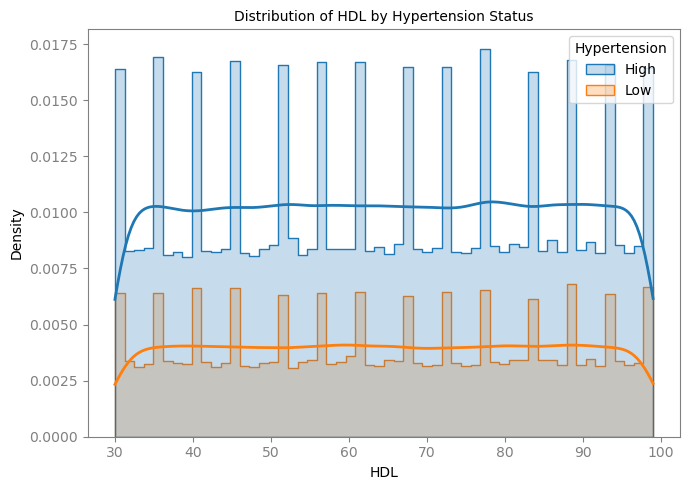

_________________________________________________________________________________________________________________________________



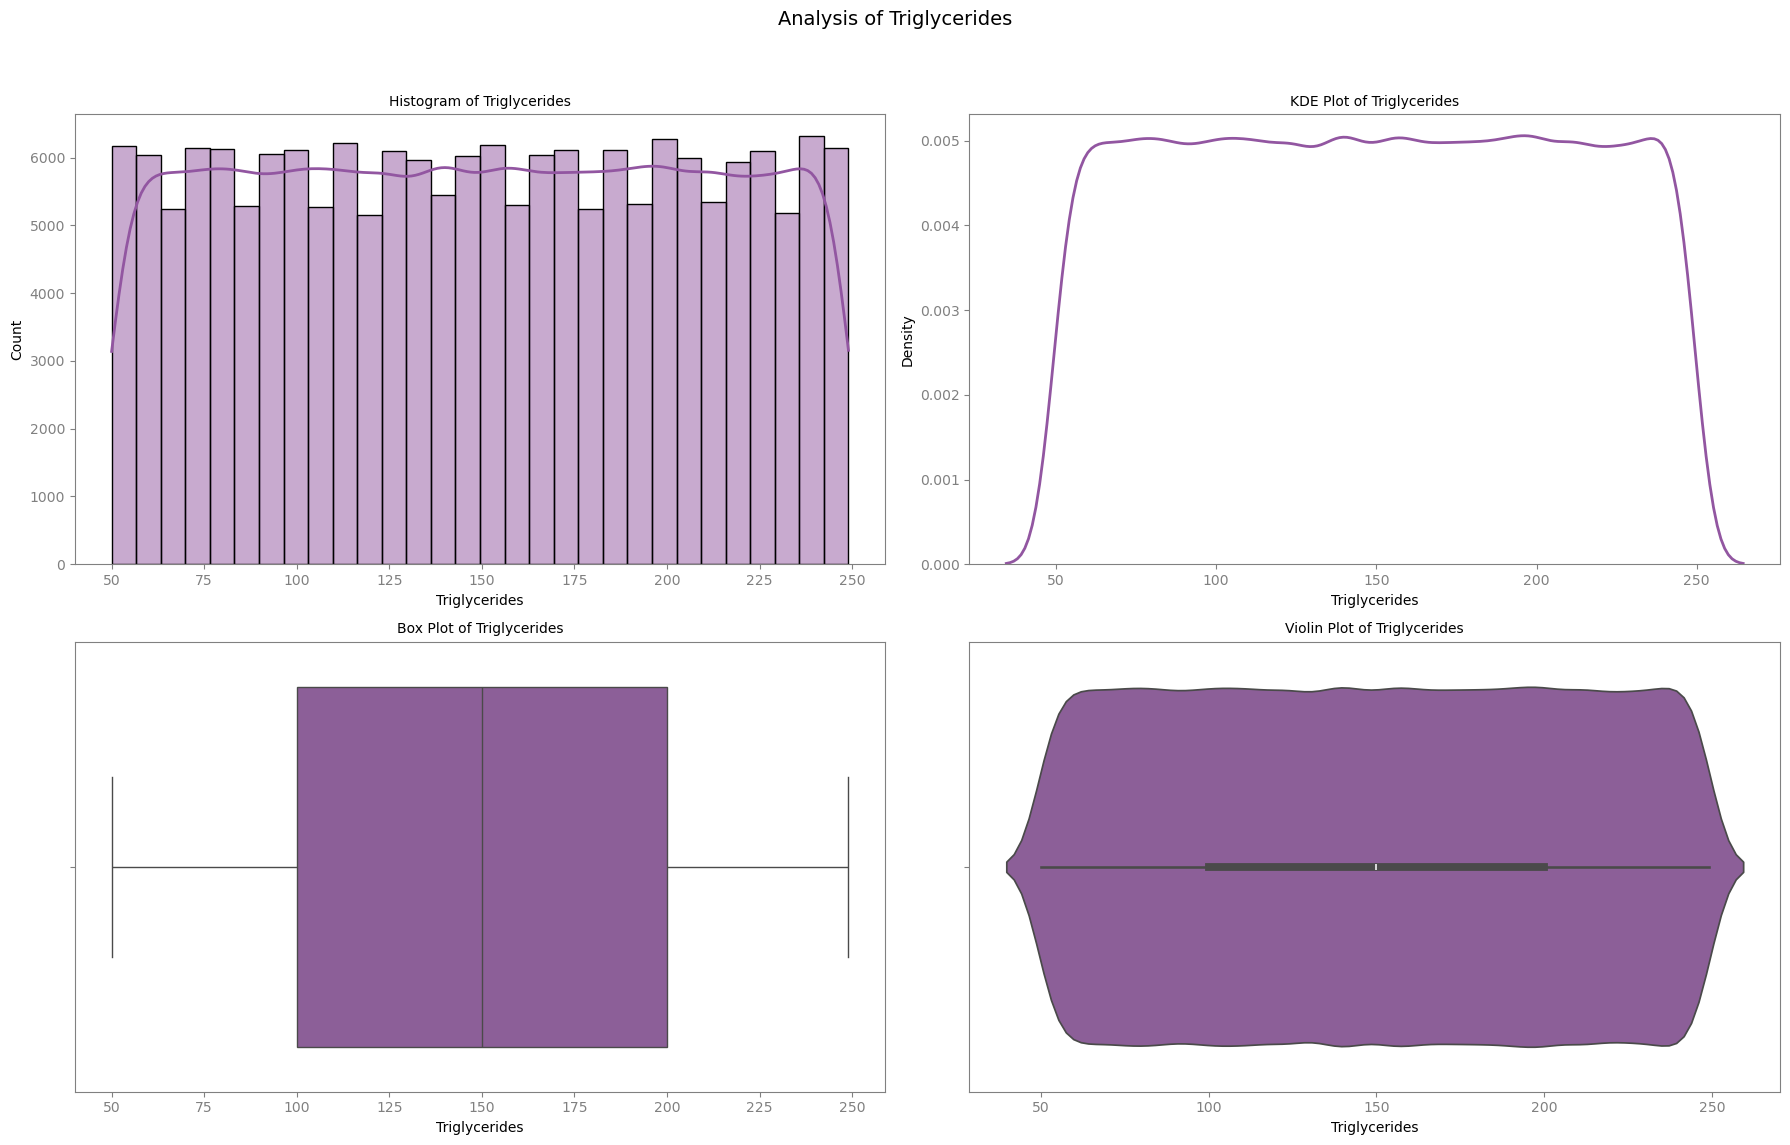

          Triglycerides
Mean            149.570
Median          150.000
Mode             52.000
Min              50.000
Max             249.000
Range           199.000
IQR             100.000
Skewness         -0.001
Kurtosis         -1.200


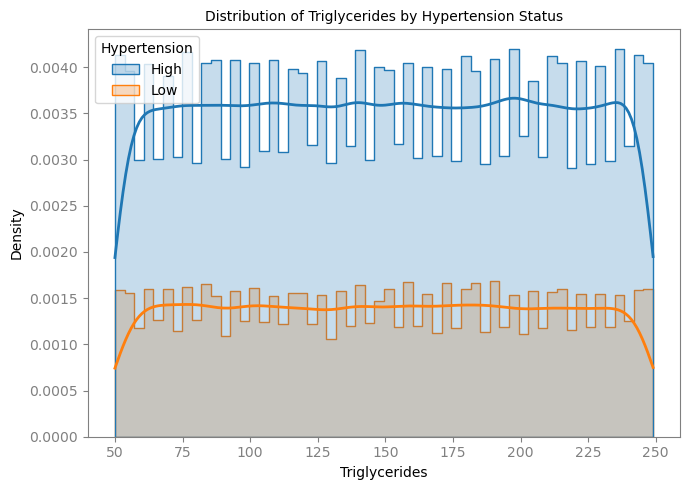

_________________________________________________________________________________________________________________________________



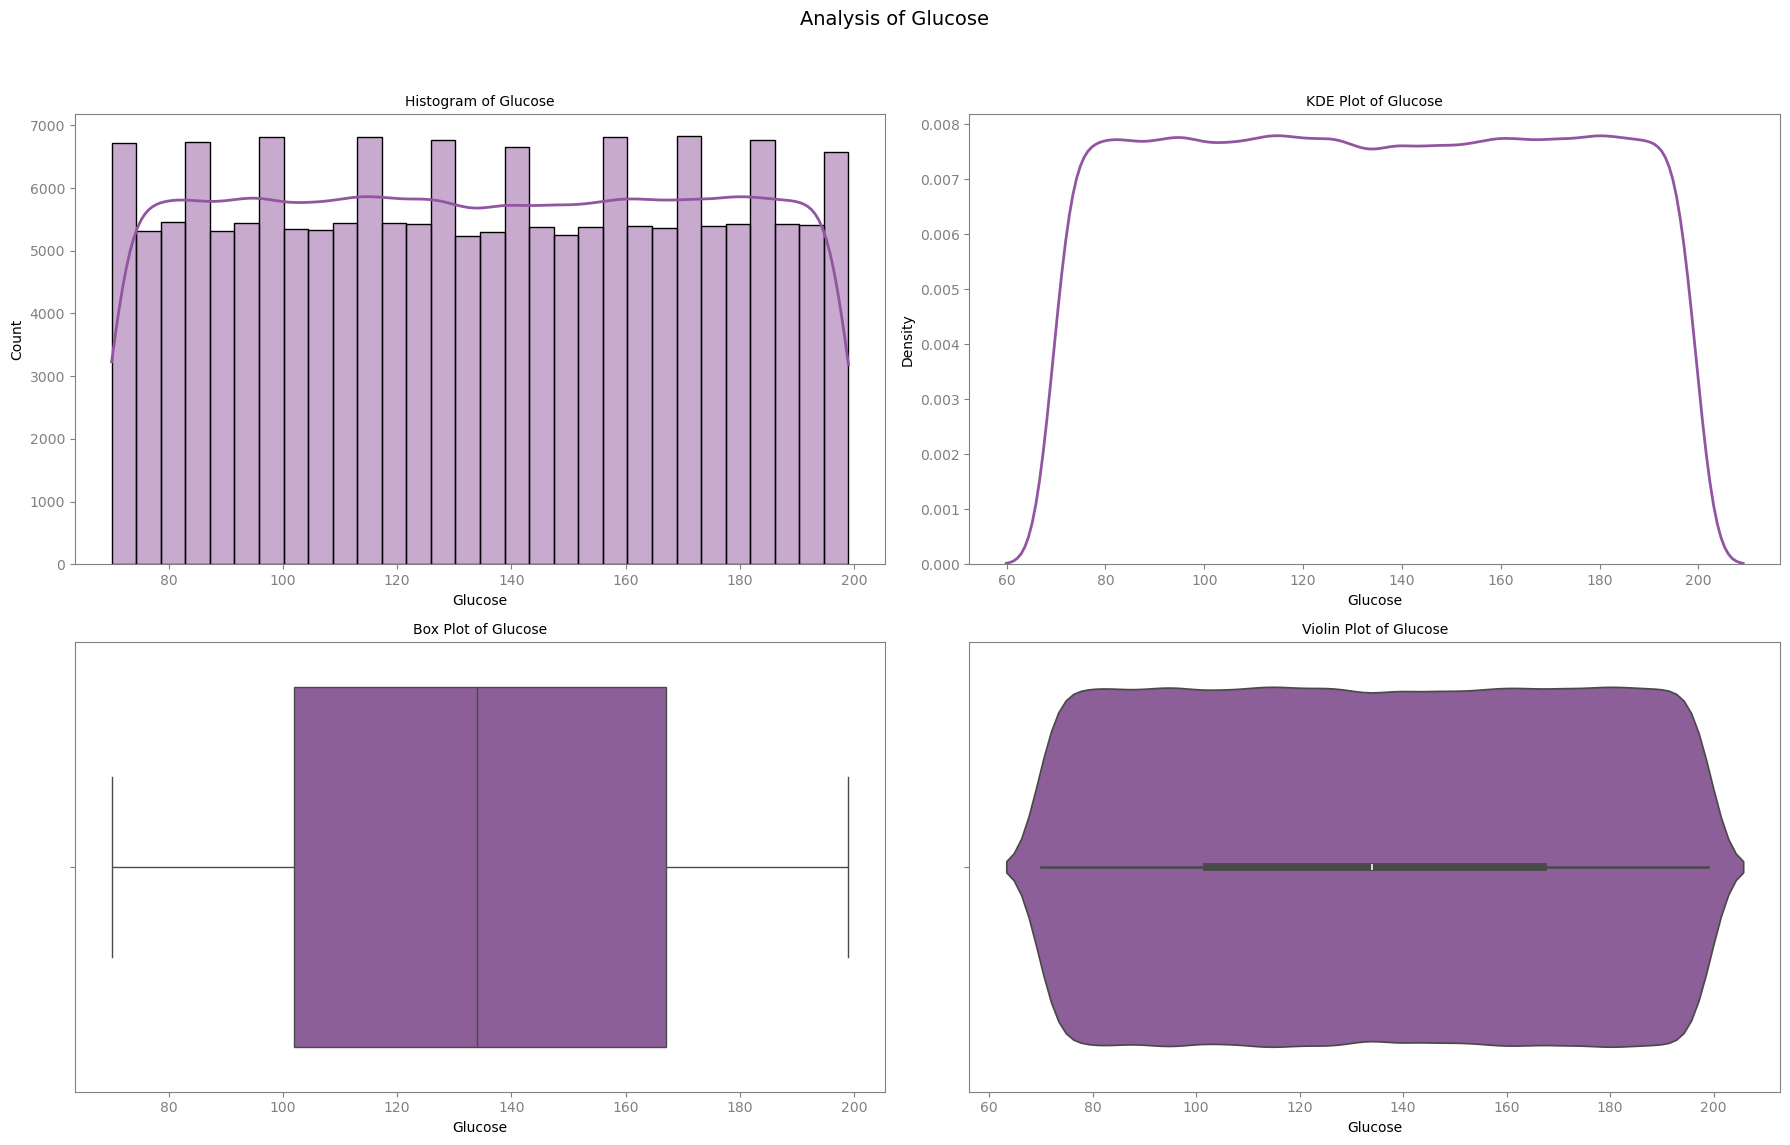

          Glucose
Mean      134.488
Median    134.000
Mode      177.000
Min        70.000
Max       199.000
Range     129.000
IQR        65.000
Skewness    0.000
Kurtosis   -1.204


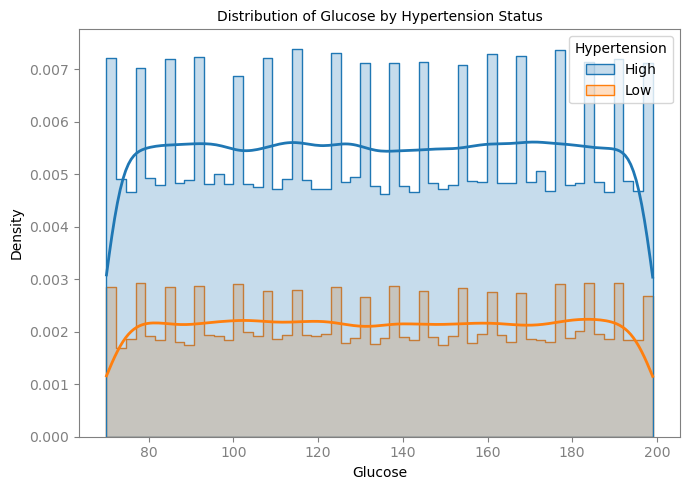

_________________________________________________________________________________________________________________________________



In [384]:
hue = target_col
for feature in numeric_cols:
    plot_numeric(df_1, feature, )
    
    #Plot grouped by Hypertension status
    plt.figure(figsize=(7, 5))
    # plt.hist(df_1[feature][df_1[hue] == 'Yes'], bins=30, alpha=0.5, label='Hypertension: Yes', color=PRIMARY_COLOR)
    sns.histplot(data=df_1, x=feature, hue=hue, kde=True, element='step', stat='density')
    plt.title(f'Distribution of {feature} by Hypertension Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    # plt.legend(title=hue)
    plt.tight_layout()
    plt.show()
    print("_________________________________________________________________________________________________________________________________\n")

#### <font color='plum'>Categorical Feature Analysis 

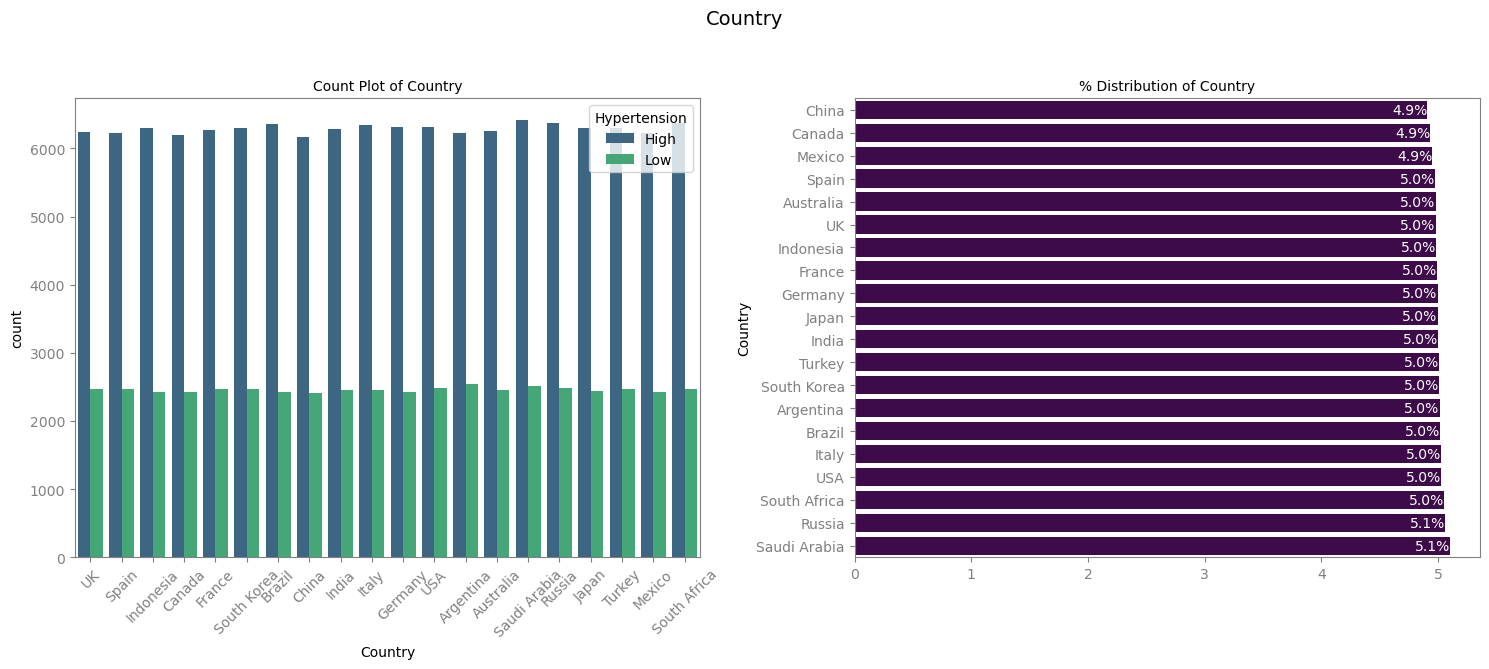


Value counts for Country:
Country
Saudi Arabia     5.1%
Russia          5.06%
South Africa    5.05%
USA             5.03%
Italy           5.03%
Brazil          5.02%
Argentina       5.01%
South Korea     5.01%
Turkey          5.01%
India            5.0%
Japan            5.0%
Germany          5.0%
France          4.99%
Indonesia       4.99%
UK              4.98%
Australia       4.98%
Spain           4.97%
Mexico          4.95%
Canada          4.93%
China           4.91%
Name: proportion, dtype: object


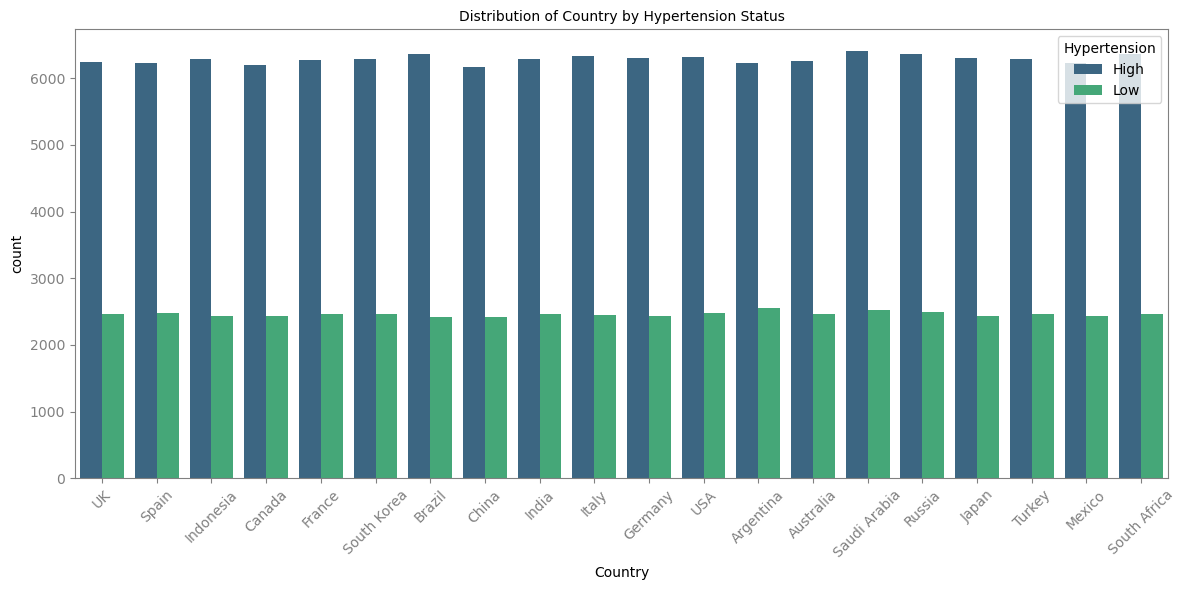

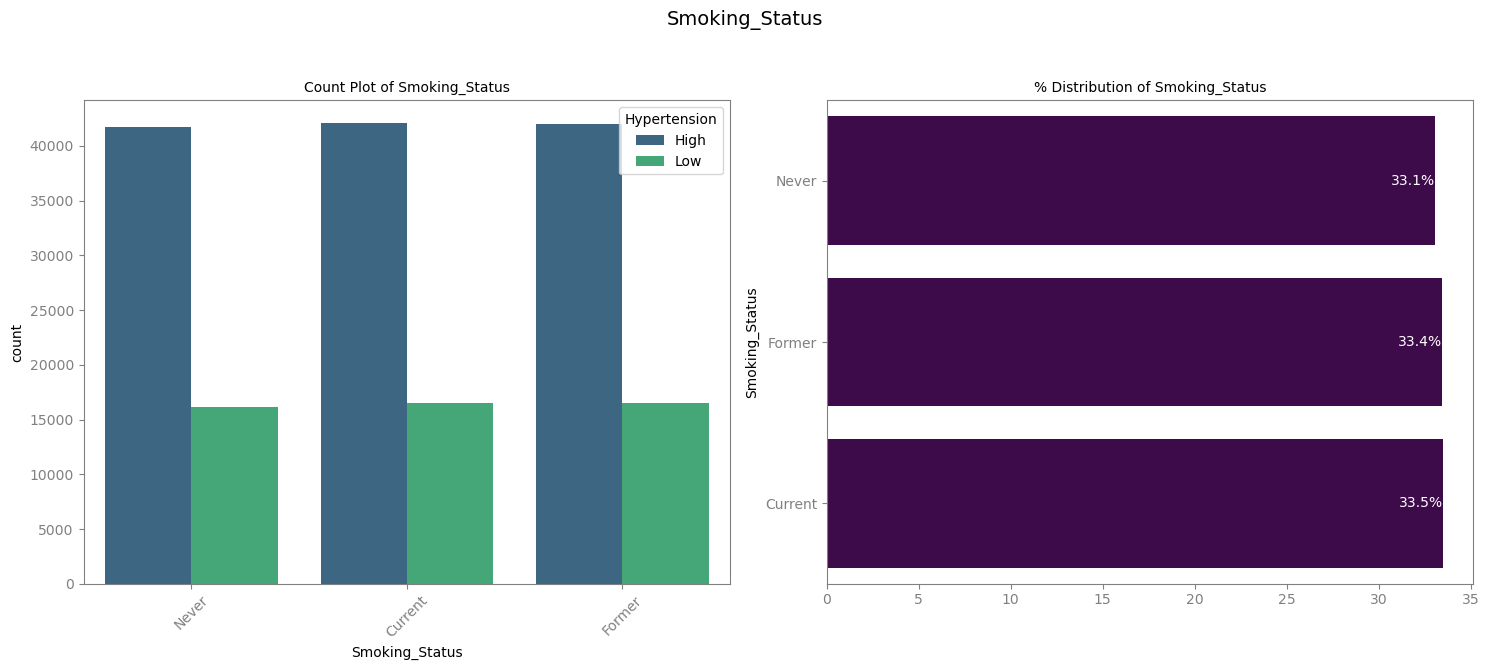


Value counts for Smoking_Status:
Smoking_Status
Current    33.47%
Former     33.44%
Never      33.09%
Name: proportion, dtype: object


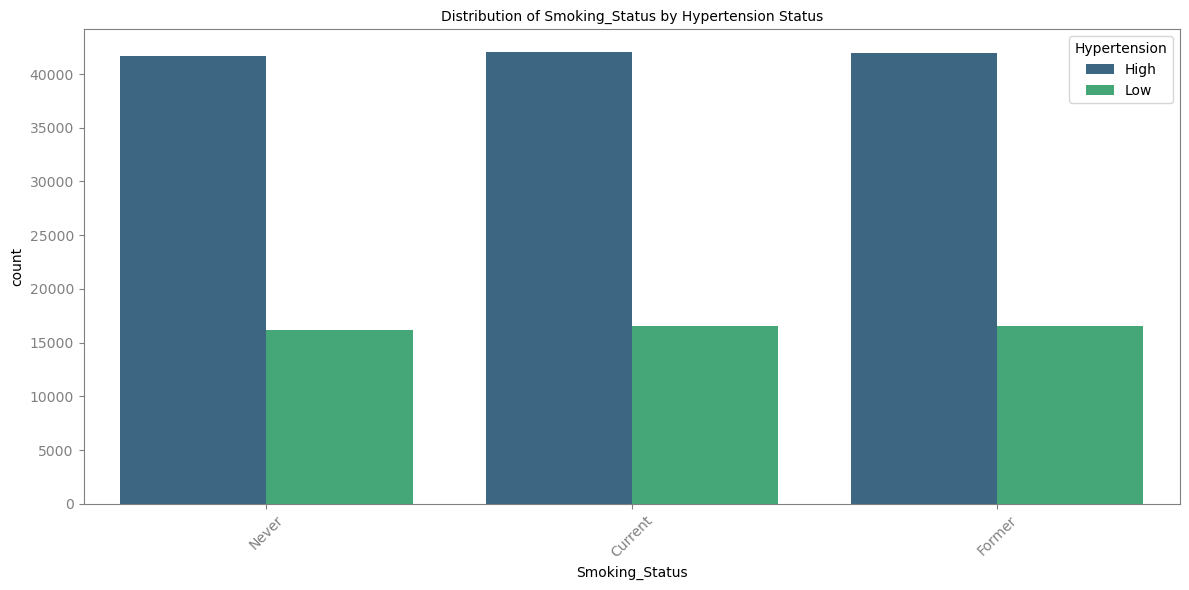

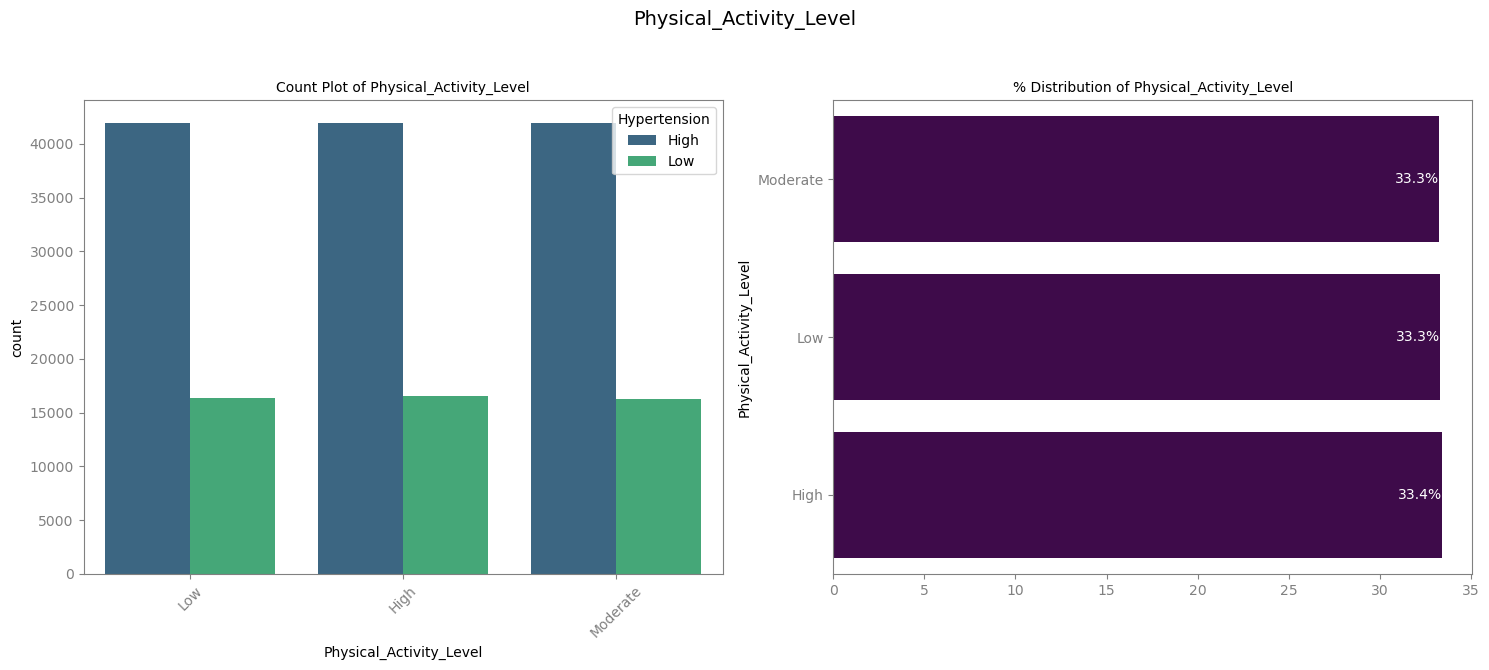


Value counts for Physical_Activity_Level:
Physical_Activity_Level
High        33.41%
Low         33.31%
Moderate    33.28%
Name: proportion, dtype: object


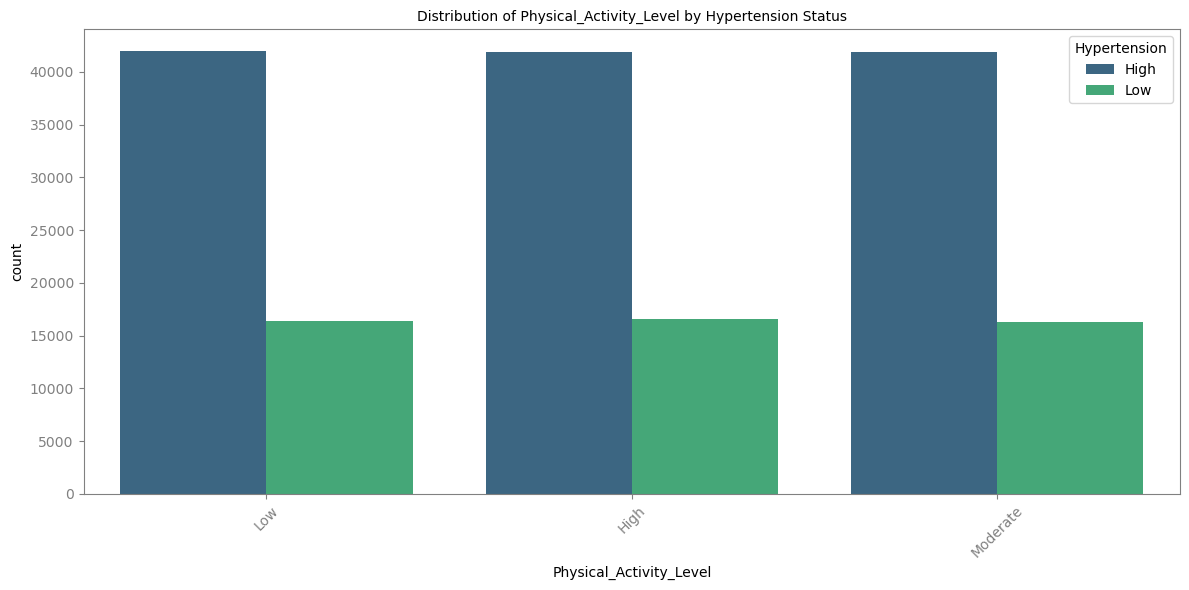

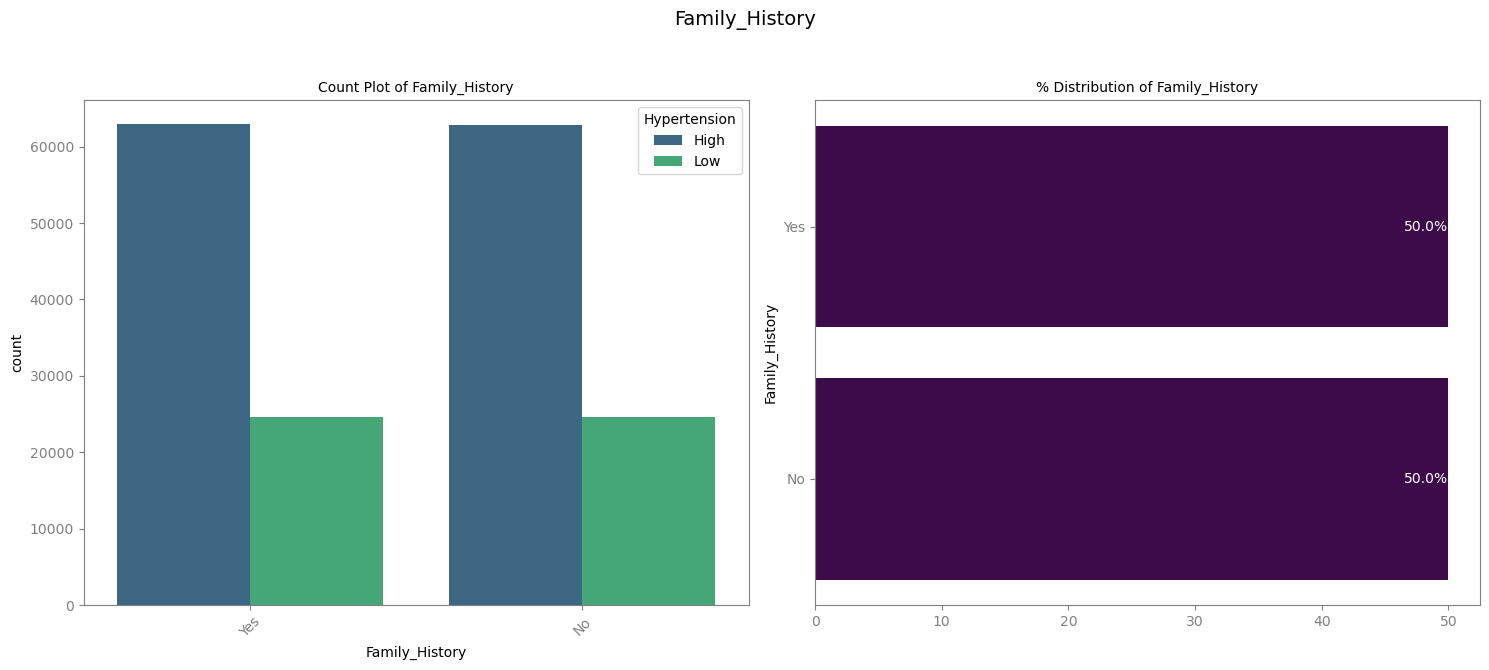


Value counts for Family_History:
Family_History
Yes    50.0%
No     50.0%
Name: proportion, dtype: object


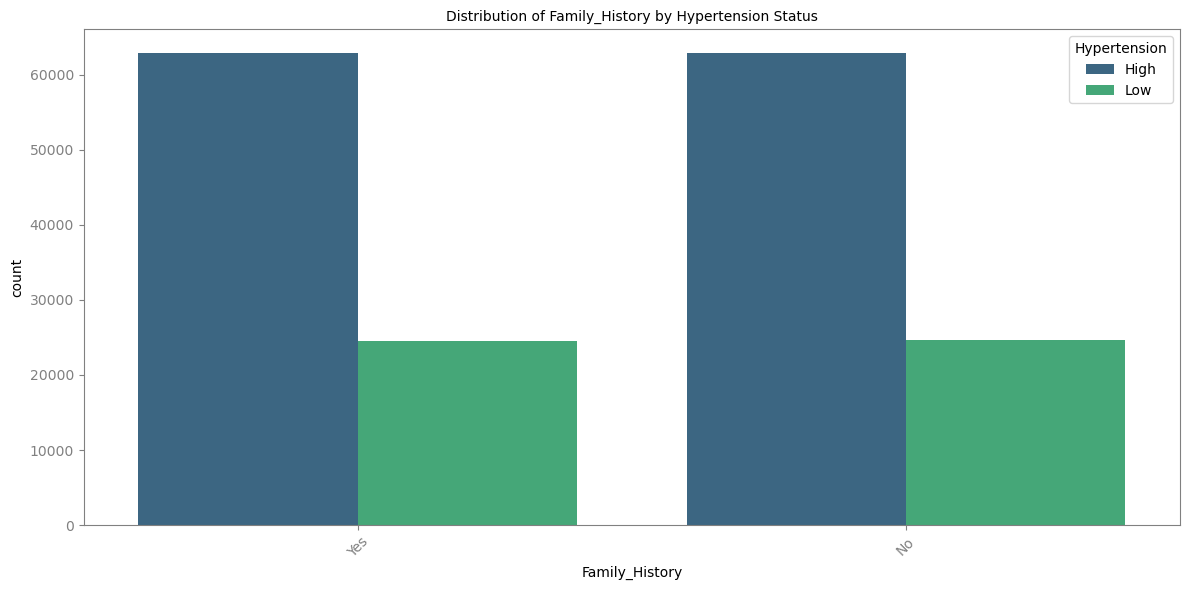

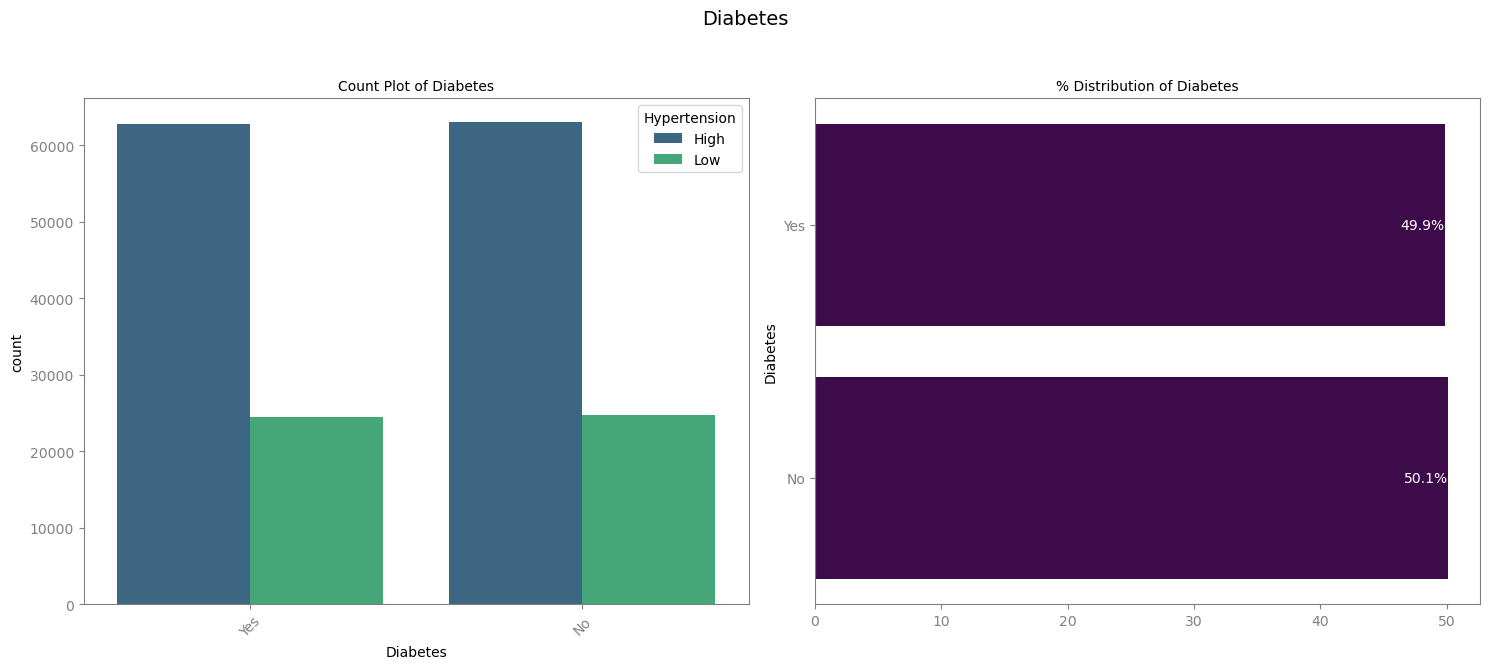


Value counts for Diabetes:
Diabetes
No     50.14%
Yes    49.86%
Name: proportion, dtype: object


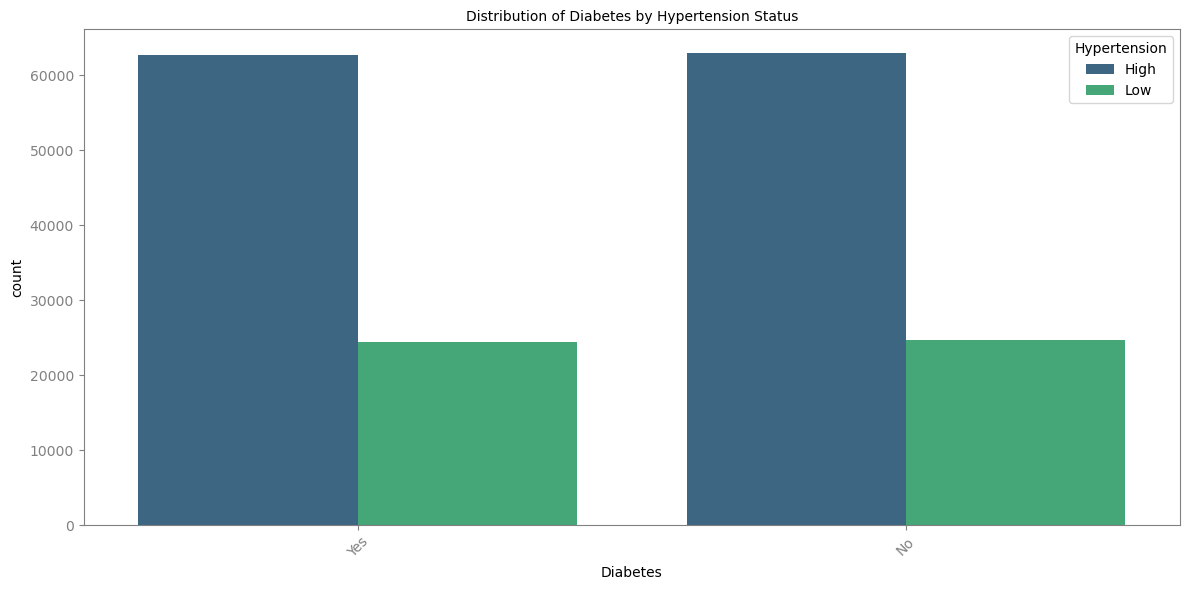

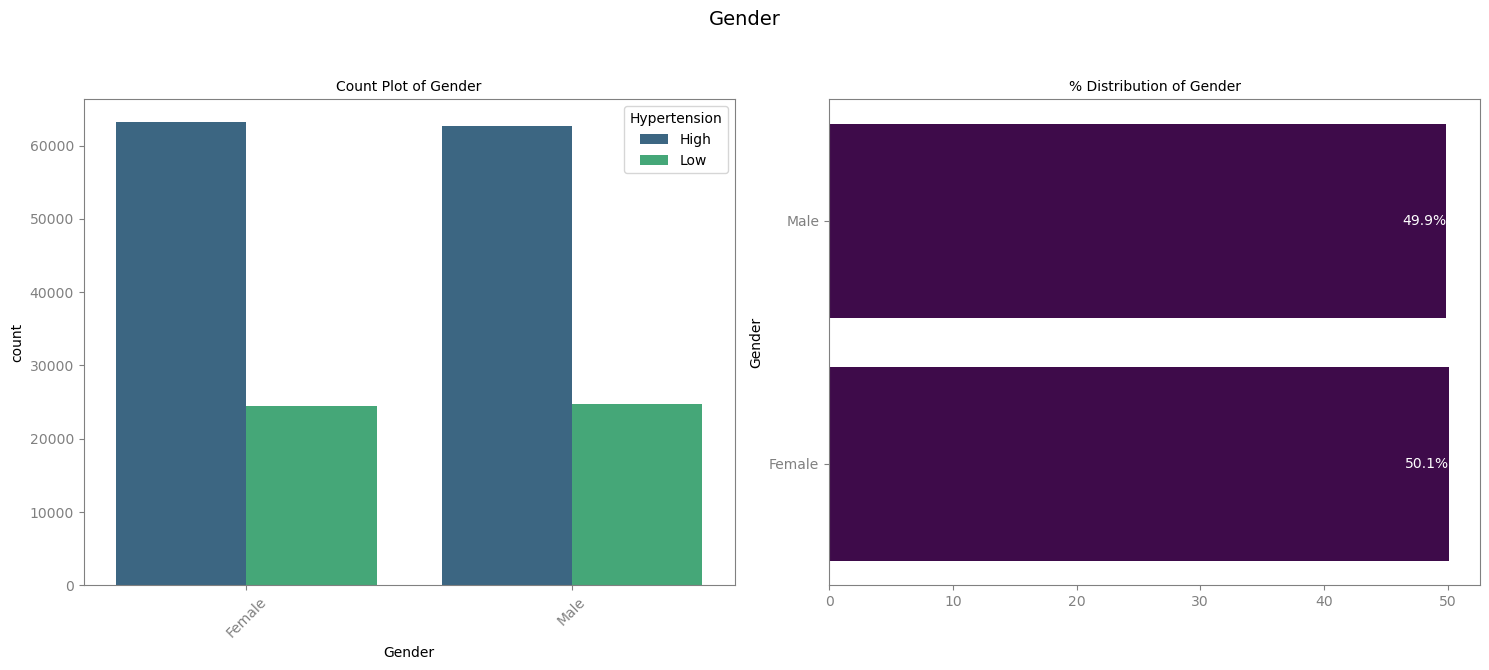


Value counts for Gender:
Gender
Female    50.11%
Male      49.89%
Name: proportion, dtype: object


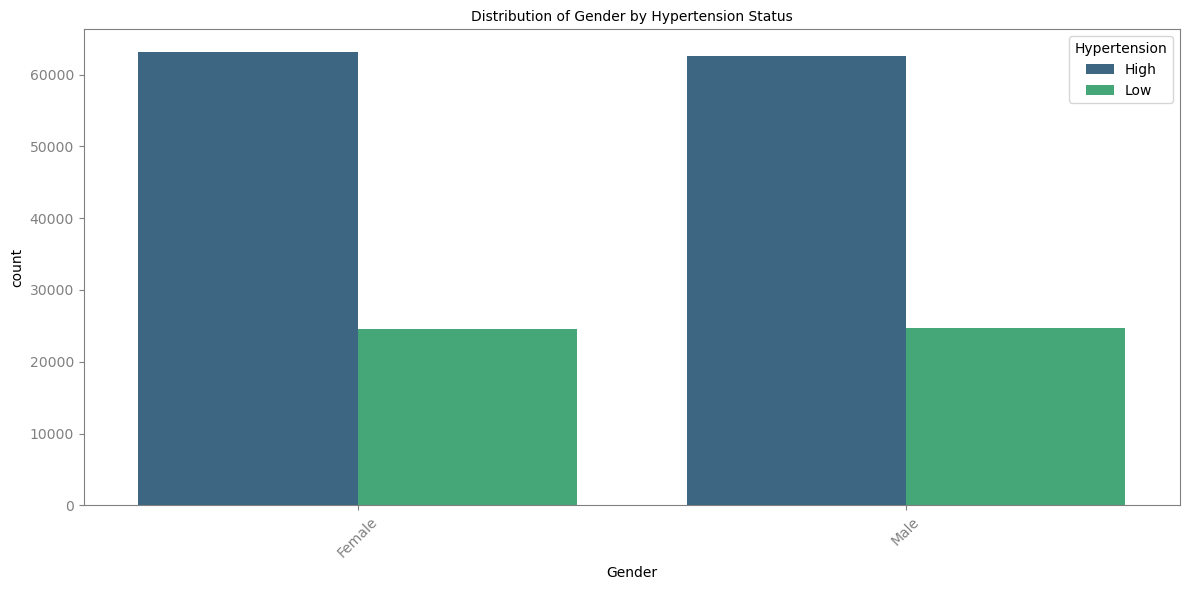

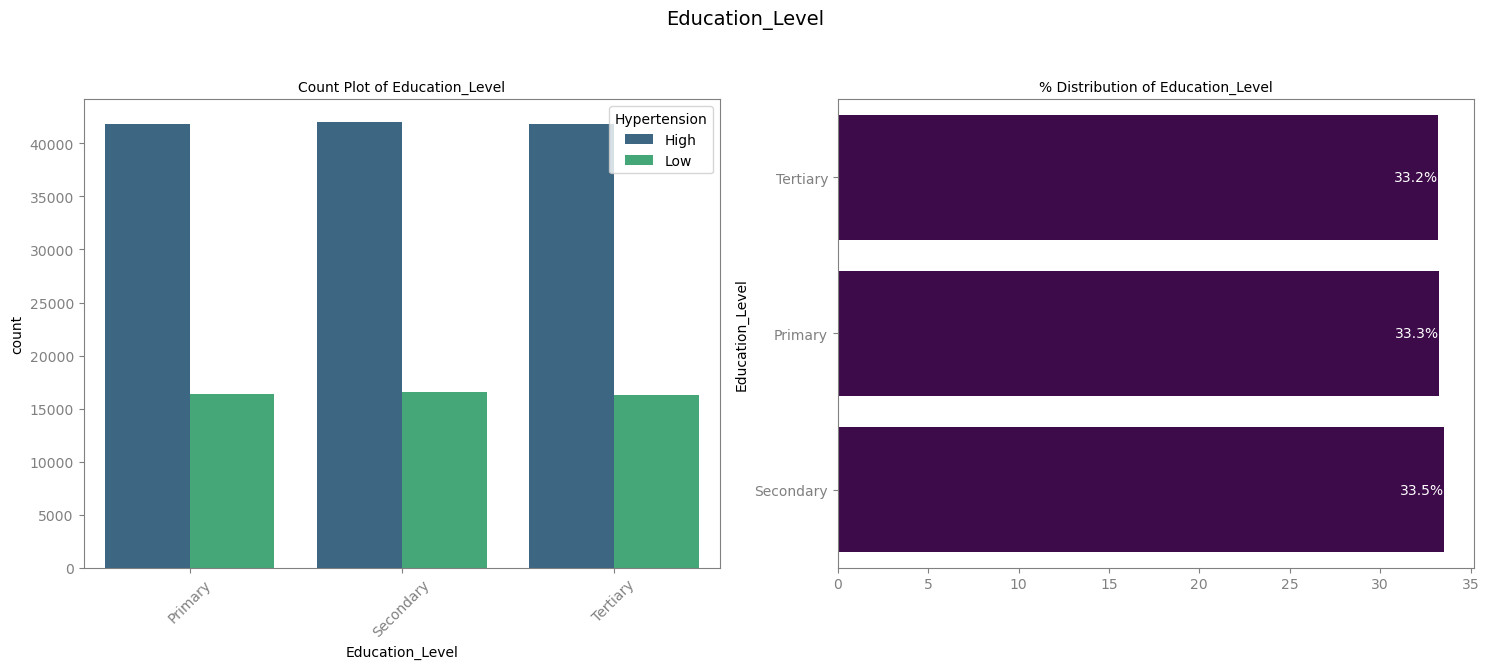


Value counts for Education_Level:
Education_Level
Secondary    33.51%
Primary      33.27%
Tertiary     33.22%
Name: proportion, dtype: object


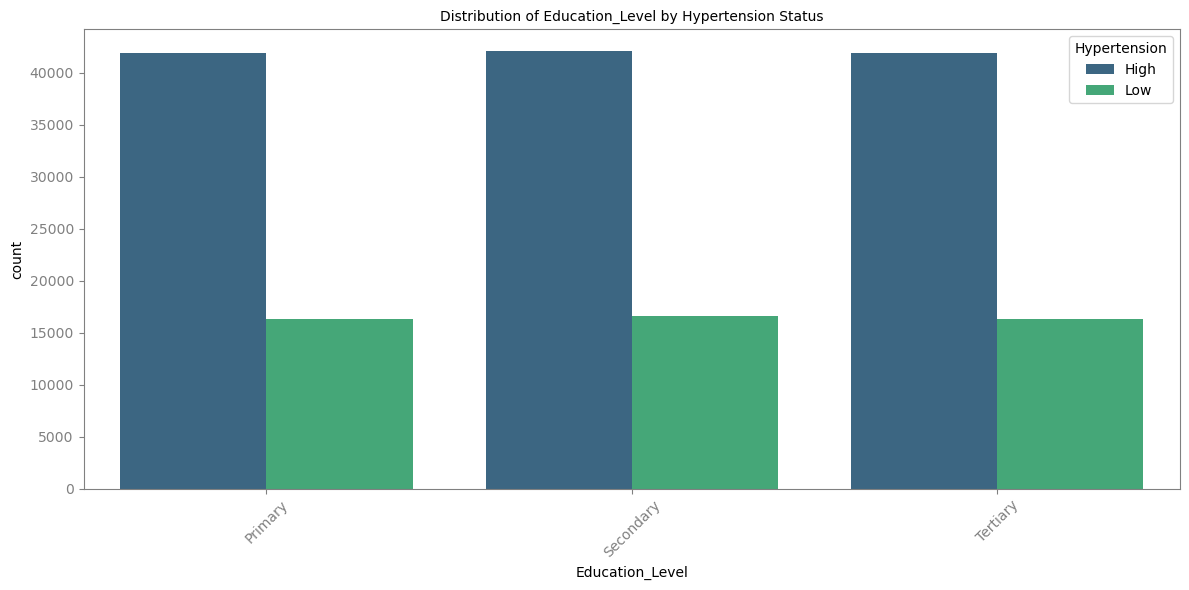

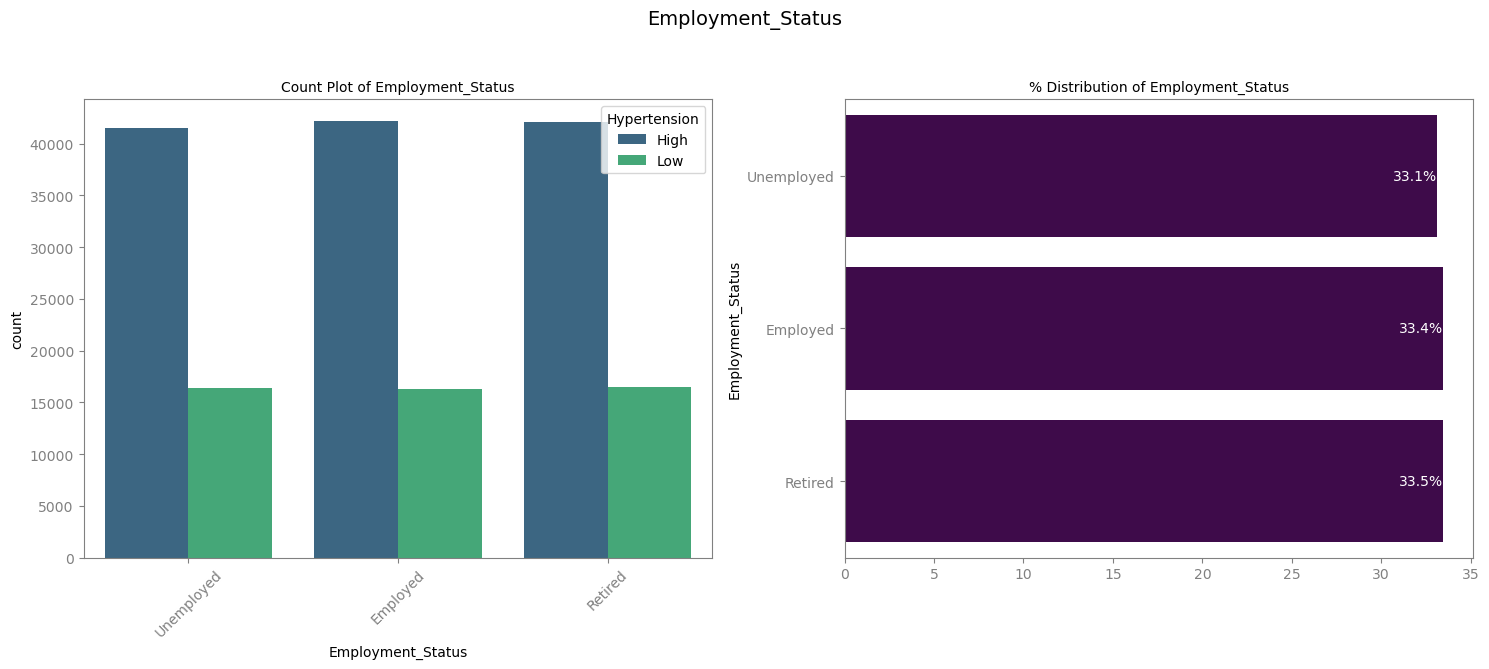


Value counts for Employment_Status:
Employment_Status
Retired       33.47%
Employed      33.43%
Unemployed     33.1%
Name: proportion, dtype: object


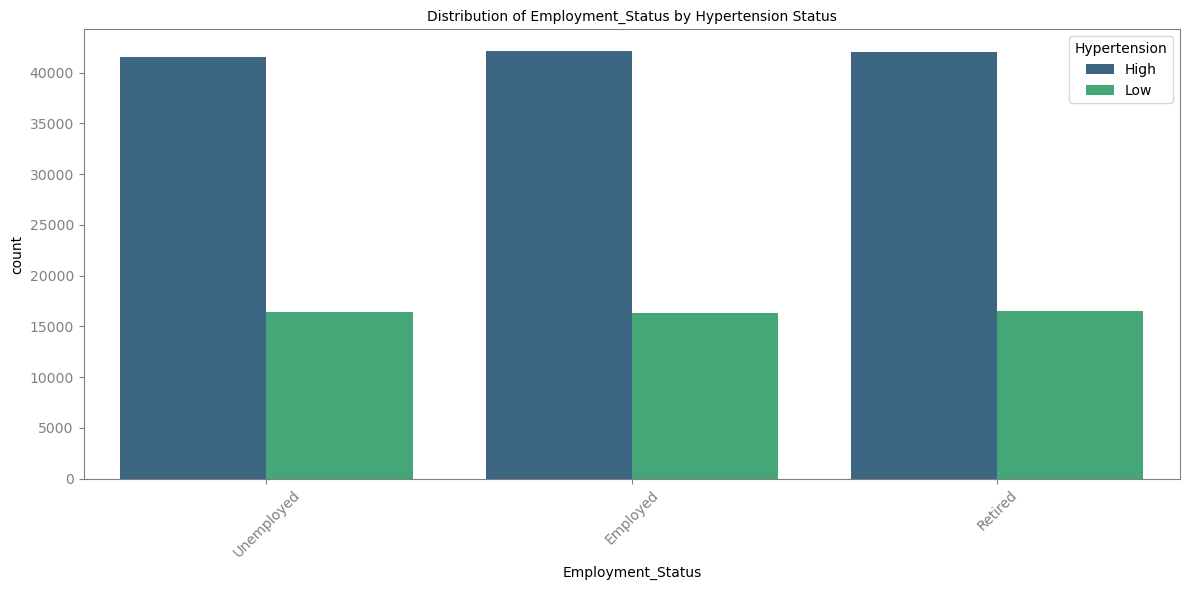

In [385]:
for feature in categorical_cols:
    if feature != 'Hypertension':  
        plot_categorical(df_1, feature, hue=hue)
        
        # Plot grouped by diabetes status
        plt.figure(figsize=(12, 6))
        sns.countplot(x=feature, hue='Hypertension', data = df_1, palette='viridis')
        plt.title(f'Distribution of {feature} by Hypertension Status')
        plt.xticks(rotation=45)
        plt.legend(title='Hypertension', loc='upper right')
        plt.tight_layout()
        plt.show()

#### <font color='plum'>Correlation Analysis

In [386]:
# Make a copy to avoid modifying original data
df_encoded = df_1.copy()

numerical_df = df_1[numeric_cols]
# numerical_df

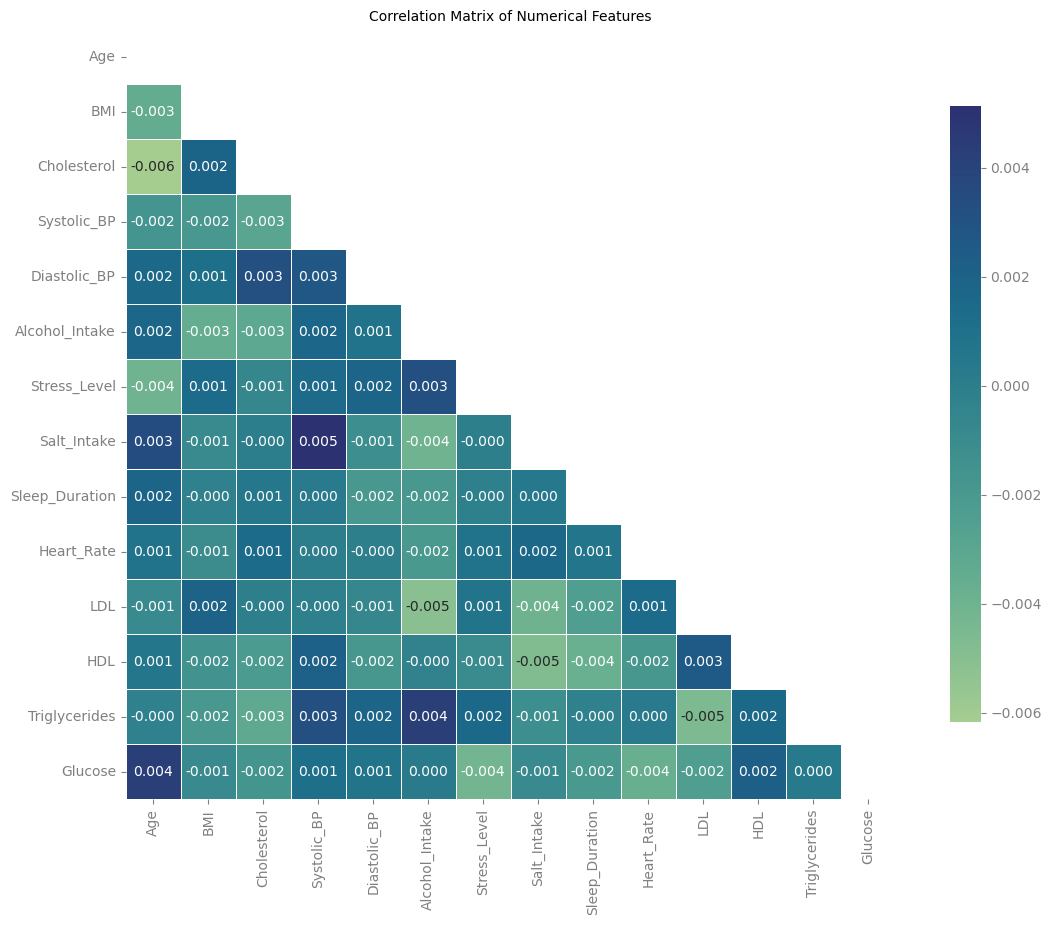

In [387]:
# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='crest', linewidths=.5, square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<font color='plum'> The calculations are not incorrect. The underlying problem:  this is a synthetic dataset generated in a manner that made each numerical feature almost completely independent of the others, which is not consistent with real-world clinical data. 

#### <font color='plum'> Pairwise Analysis

In [388]:
# sns.pairplot(numerical_df,  # Only using numerical columns
#             hue=None, 
#             diag_kind='kde',
#             plot_kws={'alpha': 0.6},  # Added transparency
#             diag_kws={'alpha': 0.8})  # Added transparency
# plt.suptitle(f'Pairplot of Numerical Features by {target_col} Status', y=1.02)
# plt.show()

#### <font color='plum'> PROFILE REPORT

In [389]:
profile = ProfileReport(
    df_1,
    html={'style': {'primary_color': 'magenta'}},
    minimal=True,
    plot={"dpi": 100, "image_format": "svg", "tight_layout": True},
)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### <font color='plum'>THOUGHTS

* <font color='plum'>**Expectations**:  Not what I'd expect from  real-world medical dataset. Biggest red flag is the correlation matrix, which shows near-zero correlation between almost all numerical features. 


* **Usability**:  Because the features appear to be *artificially independent*, I guess the dataset probably **isn't  suitable** for building a realistic hypertension risk predictive model. A model trained on this data probably wouldn't perform well on actual patient data. 

##### What is the overall shape of the distribution?

This varies by feature. For example, from the plots we generated for `Age`, the distribution appears to be relatively **uniform**, not a classic normal bell curve. Other features would need to be plotted individually to determine their specific shapes (e.g., normal, skewed, bimodal). 

##### Outliers

Yes, according to the Box Plots and Violin Plots.


#####  Does the distribution change across different groups?

This is answered by the grouped histograms. In our analysis of 'Age', we saw that the distribution for individuals with hypertension was shifted towards the higher end of the age range compared to those without, which aligns with real-world medical knowledge.

##### What are the minimum and maximum values?

The statistics table printed by the plot_numeric function explicitly lists the 'Min' and 'Max' values for each feature analyzed.

##### How do bin sizes affect the histogram?

Changing the bin width can significantly alter the appearance of a histogram. A smaller bin width can reveal more detail and local patterns (like bimodality) but can also be noisy. A larger bin width gives a smoother, more general overview but might hide important features.  
Does the distribution appear normal?



### <font color='plum'> 3.2. Chronic Kidney Disease Dataset

Contains comprehensive data for 1,659 patients, including 54 variables spanning medical history, lab results, medication usage, quality of life, and environmental
exposure. Ideal for regression, classification, and clustering analyses.
https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

#### Load

In [390]:
file_path = "rabieelkharoua/chronic-kidney-disease-dataset-analysis"
file_name = "Chronic_Kidney_Dsease_data.csv"

# Load the latest version
df_2 = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  file_path,
  file_name,
)

df_2.head()

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0           76.076800                    0                              0   
1           40.128498                    0                              0   
2           92.872842                    0                              1   
3           90.080321                    0                              0   
4            5.258372                    0                              0   

   WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
0             1                  1.018824             4.966808   
1             0                  3.923538             8.189275   
2             1                  1.429906             7.624028   
3             0                  3.226416             3.282688   
4             1                  0.285466             3.849498   

   HealthLiteracy  Diagnosis  DoctorInCharge  
0        9.871449          1    Confidential  
1        7.161765          1    Confidential  
2        7.354632          1    Confidential  
3        6.629587          1    Confidential  
4        1.437385          1    Confidential  

[5 rows x 54 columns]

#### <font color='plum'> 3.2.a. Exploratory Data Analysis

In [391]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [392]:
df_2.columns = df_2.columns.str.strip()  # Strip whitespace from column names

columns_to_drop = ['PatientID', 'DoctorInCharge']  # Columns to drop
df_2.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Drop specified columns


df_2.describe()

Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.471449     0.000000            5.051156   
50%          2.000000    27.652077     0.000000            9.951503   
75%          2.000000    34.015849     1.000000           14.967100   
max          3.000000    39.993532     1.000000           19.992713   

       PhysicalActivity  DietQuality  ...  MuscleCramps      Itching  \
count       1659.000000  1659.000000  ...   1659.000000  1659.000000   
mean           5.024247     5.028544  ...      3.525510     5.054869   
std            2.866274     2.865777  ...      2.026131     2.880460   
min            0.001186     0.002407  ...      0.006327     0.013697   
25%            2.555038     2.558443  ...      1.820793     2.532867   
50%            5.072395     4.989810  ...      3.572522     5.087086   
75%            7.460563     7.428290  ...      5.254956     7.552093   
max            9.998167     9.998927  ...      6.984636     9.998313   

       QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
count         1659.000000          1659.000000                    1659.000000   
mean            49.730659             0.044002                       0.103074   
std             27.827593             0.205162                       0.304147   
min              0.087256             0.000000                       0.000000   
25%             26.991708             0.000000                       0.000000   
50%             48.970075             0.000000                       0.000000   
75%             73.913997             0.000000                       0.000000   
max             99.987510             1.000000                       1.000000   

       WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
count   1659.000000               1659.000000          1659.000000   
mean       0.197107                  2.000336             4.947788   
std        0.397934                  1.141635             2.869959   
min        0.000000                  0.001082             0.005392   
25%        0.000000                  1.005802             2.498119   
50%        0.000000                  2.040635             4.974069   
75%        0.000000                  2.947213             7.499783   
max        1.000000                  3.999469             9.992345   

       HealthLiteracy    Diagnosis  
count     1659.000000  1659.000000  
mean         5.144973     0.918626  
std          2.901138     0.273492  
min          0.004436     0.000000  
25%          2.569561     1.000000  
50%          5.182949     1.000000  
75%          7.733253     1.000000  
max          9.993754     1.000000  

[8 rows x 52 columns]

In [393]:
target_col = 'Diagnosis'

In [394]:

# categorical_cols    = ['Country', 'Smoking_Status', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']
# numeric_cols        = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']
# len(categorical_cols), len(numeric_cols)
categorical_cols = []
numeric_cols = []

for col in df_2.columns:
    if len(df_2[col].unique()) < 5:
        categorical_cols.append(col);
    else:
        numeric_cols.append(col);
    print(f'{col}: {df_2[col].unique()},\n{df_2[col].nunique()} unique values\n')

Age: [71 34 80 40 43 22 41 72 21 49 57 83 79 52 77 68 78 61 81 66 70 74 26 58
 37 23 33 28 90 63 27 54 55 69 25 73 82 53 67 59 45 60 48 64 84 20 30 24
 47 31 42 56 46 62 32 51 85 76 89 75 38 87 36 88 35 39 86 50 44 65 29],
71 unique values

Gender: [0 1],
2 unique values

Ethnicity: [0 1 2 3],
4 unique values

SocioeconomicStatus: [0 1 2],
3 unique values

EducationLevel: [2 3 1 0],
4 unique values

BMI: [31.06941375 29.69211876 37.39482182 ... 21.95121871 24.96414904
 19.25325818],
1659 unique values

Smoking: [1 0],
2 unique values

AlcoholConsumption: [ 5.12811186 18.60955184 11.88242933 ... 15.82595492 12.96746151
 11.39650955],
1659 unique values

PhysicalActivity: [1.67621971 8.37757445 9.6074011  ... 7.34996438 0.61861424 7.44631444],
1659 unique values

DietQuality: [0.24038556 6.50323323 2.10482836 ... 5.0381937  4.55757703 0.75739645],
1659 unique values

SleepQuality: [4.07643366 7.65281255 4.39278611 ... 8.44085924 5.5270997  8.19167801],
1659 unique values

FamilyHistoryKi

In [395]:
print(f"Categorical columns: {categorical_cols}")
print(f"Numeric columns: {numeric_cols}")
print(len(categorical_cols), len(numeric_cols))

Categorical columns: ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'Diagnosis']
Numeric columns: ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'Healt

## 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [396]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_square_area_graph(data, title=""):
    """
    Creates a square area graph (waffle chart) from a dictionary of data.

    Args:
        data (dict): A dictionary where keys are labels and values are counts.
                     The values should be perfect squares for this visualization.
        title (str): The title of the chart.
    """
    colors = ['turquoise', 'darkgray', 'lightgray']  # Colors for offers, onsite, and total
    labels = list(data.keys())
    values = list(data.values())

    # Ensure the first value is the largest for the background grid
    total       = max(values)
    grid_size   = int(total**0.5)

    fig, ax = plt.subplots(1, figsize = (6, 6))
    ax.set_aspect('equal')
    ax.axis('off') # Turn off the axis
    ax.set_title(title, fontsize = 12, pad = 5)

    legend_patches = []

    # Iterate backwards to draw the largest square first
    for i in range(len(values) - 1, -1, -1):
        count   = values[i]
        label   = labels[i]
        color   = colors[i]
        size    = int(count**0.5)

        for x in range(size):
            for y in range(size):
                rect = patches.Rectangle(
                    (x, y), 1, 1,
                    linewidth = 1,
                    edgecolor = 'white',
                    facecolor = color
                )
                ax.add_patch(rect)

        # Create a patch for the legend
        legend_patches.append(patches.Patch(color=color, label=f'{count} {label}'))


    # Set plot limits
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)

    # Add the legend, reversing the order to match the data
    plt.legend(handles=legend_patches[::-1], 
               bbox_to_anchor=(1, 0.7), 
               loc='upper left', fontsize=8, frameon=False)
    plt.tight_layout()
    plt.show()


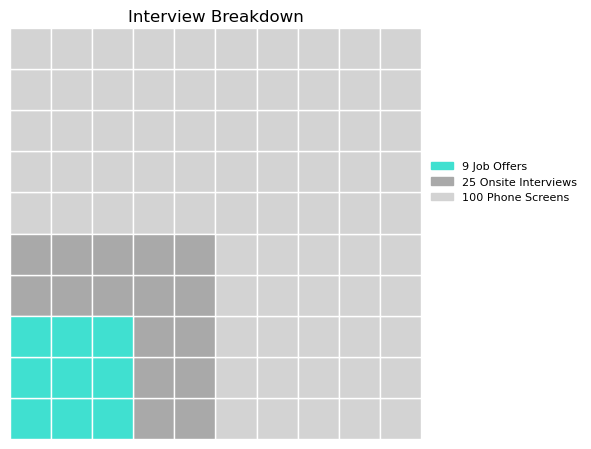

In [397]:

# Data from the hiring example
hiring_data = {
    "Job Offers": 9,
    "Onsite Interviews": 25,
    "Phone Screens": 100,
}


# WAFFLE CHART
create_square_area_graph(hiring_data, title = "Interview Breakdown")